# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

## Respuesta:

En primer lugar, debo solicitar información sobre el proyecto, la urgencia de los resultados, la profundidad de análisis que requiere, que formato debería tener la respuesta óptima, entre otros.

Luego, necesito familiarizarme con la metodología de recolección de datos, conocer si mi base de datos pasa por algún filtro que crea que no es conveniente hacer. Esto me ayudará a poder prevenir algunas inconsistencias en cuanto a los datos (si las hubiera).

Por último, para trabajar en el problema planteado, necesito datos sobre las características de los departamentos.  

Necesito saber:
* **Los Precios**, dado que es la variable a estimar.

Además necesito que junto con estos precios, les acompañen datos sobre las características de las propiedades, tales como:
* _Tipo de propiedad_ : Casa, departamento, etc.
* _Ubicacion geografica_ : Barrio, numero de piso, altura de calle.
* _Cantidad de Habitaciones_
* _Cantidad de Baños_
* _Cantidad de ambientes_
* _Número de pisos por propiedad_
* _Tiene o no Balcón_
* _Tiene o no Patio_
* _Tamaño del Patio_
* _Tamaño del Terreno cubierto_
* _Tiene o no Terraza_
* _Tiene o no Asador_
* _Tiene o no Pileta_
* _Tiene o no Quincho_
* _Distancia a lugares importantes_ como: playa, centros de las ciudades, lagos.
* _Costos fijos_
* _Antigüedad_
* _Remodelado o no_
* _etc_.

Todas estas características tanto cualitativas como cuantitativas podrán ser útiles para encontrar las relaciones de dichas variabes frente al precio del inmueble, y tener de esta forma, una estimación certera para lograr una tasación - al menos - cercana a la verdadera.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Carga el dataset usando las funcionalidades de Pandas.
dataset = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [3]:
# Imprimir cuántas filas y columnas tiene
dataset.shape

(146660, 19)

In [4]:
# y sus cinco primeras instancias
dataset.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [5]:
dataset.tail()

start_date    end_date  created_on        lat        lon         l1  \
146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   
146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   
146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   
146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   
146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   

                              l2           l3  rooms  bedrooms  bathrooms  \
146655    Bs.As. G.B.A. Zona Sur  Berazategui    2.0       1.0        1.0   
146656  Bs.As. G.B.A. Zona Norte        Pilar    4.0       3.0        2.0   
146657  Bs.As. G.B.A. Zona Norte        Pilar    1.0       1.0        1.0   
146658  Bs.As. G.B.A. Zona Norte        Pilar    2.0       1.0        1.0   
146659  Bs.As. G.B.A. Zona Norte        Pilar    3.0       2.0        1.0   

        surface_total  surface_covered     price currency  \
146655           54.0             48.0  165000.0      USD   
146656          164.0             90.0  130000.0      USD   
146657           50.0             35.0   73000.0      USD   
146658           38.0             38.0   68000.0      USD   
146659           75.0             75.0   98000.0      USD   

                                                    title  \
146655  Departamento en Venta en Barrio Privado Barran...   
146656  Venta departamentos tres dormitorios jardín co...   
146657  Venta departamento de un ambiente Manzanares C...   
146658           Departamento en Venta. Manzanares chico.   
146659          Departamento en venta en Manzanares Chico   

                                              description property_type  \
146655  Departamento de 2 ambientesCocina con alacena ...  Departamento   
146656  Muy buen duplex a estrenar en dos plantas más ...  Departamento   
146657  En los Condominios de Campo Manzanares Chico, ...  Departamento   
146658  Broker: Maria 11Departamento de dos ambientes ...  Departamento   
146659  Departamento en el Barrio Manzanares Chico , e...  Departamento   

       operation_type  
146655          Venta  
146656          Venta  
146657          Venta  
146658          Venta  
146659          Venta

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
# imprime en pantalla los nombres de las columnas
dataset.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [7]:
#cuántos valores faltantes hay por columna.
dataset.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [9]:
# ¿Cuántos tipos de propiedad hay publicados según este dataset?

#cant_tipos_propiedad = []

#for i in dataset["property_type"].unique():
#        cant_tipos_propiedad.append(1)

#cant_tipos_propiedad = sum(cant_tipos_propiedad)

#print("Cantidad de tipos de propiedad:", cant_tipos_propiedad)

cant_tipos_propiedad = len(dataset["property_type"].unique())
print("La cantidad de tipos de propiedad es:", cant_tipos_propiedad)

La cantidad de tipos de propiedad es: 10


In [10]:
# ¿Cuántos instancias por cada tipo de propiedad hay en el dataset?
dataset["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Text(0.5, 1.0, 'Tipo de Propiedades')

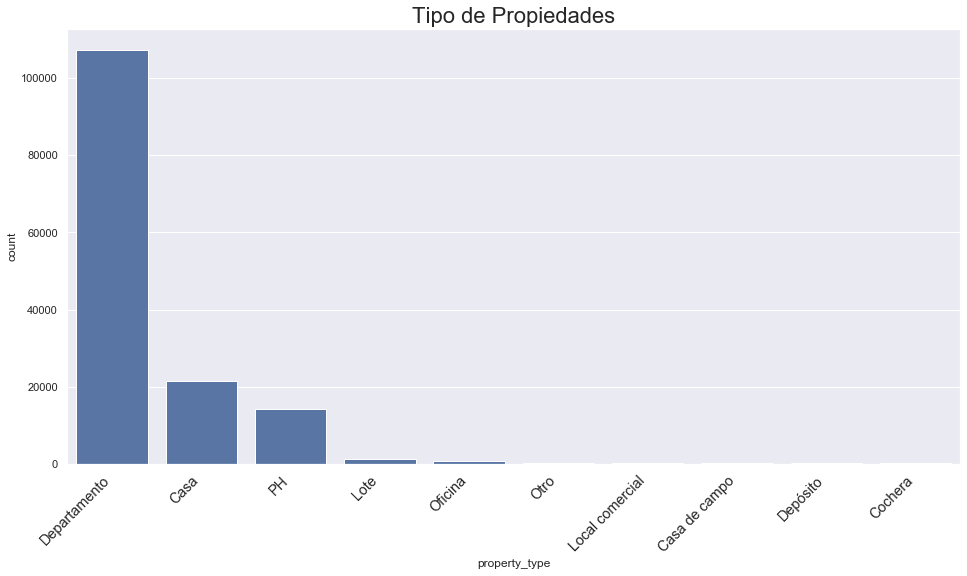

In [11]:
# Un gráfico apropiado de Seaborn.
fig, ax = plt.subplots(figsize=(16,8))

chart= sns.countplot(x="property_type", 
                     data = dataset, 
                     order = dataset["property_type"].value_counts().index, 
                     color = "b",
                     ax=ax)

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation = 45, 
                      horizontalalignment = 'right',
                      fontsize = 'large')

plt.title("Tipo de Propiedades", size=22)
#plt.savefig('tipo_de_propiedades.png')

Para mejorar la comprensión de la gran diferencia en cuanto a la cantidad de observaciones por tipos de propiedad, creo que mejor un gráfico de torta.
Además, al haber grupos tan pequeños, considero que es mejor agruparlos.

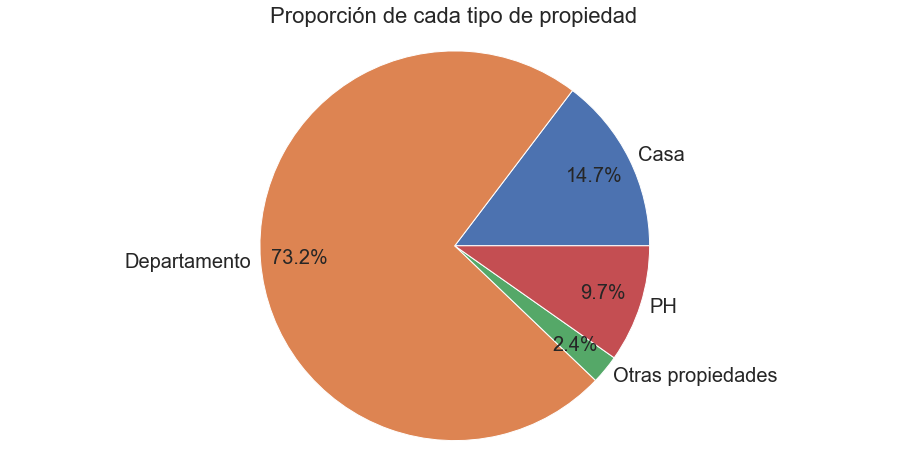

In [12]:
property_types = dataset["property_type"].value_counts()
property_types = property_types.groupby(np.where(property_types >= 2000, property_types.index, 'Otras propiedades')).sum()

fig1, ax1 = plt.subplots(figsize=(16,8))

ax1.pie(x = property_types,
        labels = property_types.index,
        autopct = '%1.1f%%',
        textprops = {'fontsize': 20},
        pctdistance = 0.8,
        labeldistance = 1.05)

ax1.axis('equal')

plt.title("Proporción de cada tipo de propiedad", size=22)

plt.show()
#plt.savefig('Proporción_tipo_de_propiedades.png')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

C:\Users\usuario\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: There are no gridspecs with layoutboxes. Possibly did not call parent GridSpec with the figure= keyword
  fig.canvas.print_figure(bytes_io, **kw)


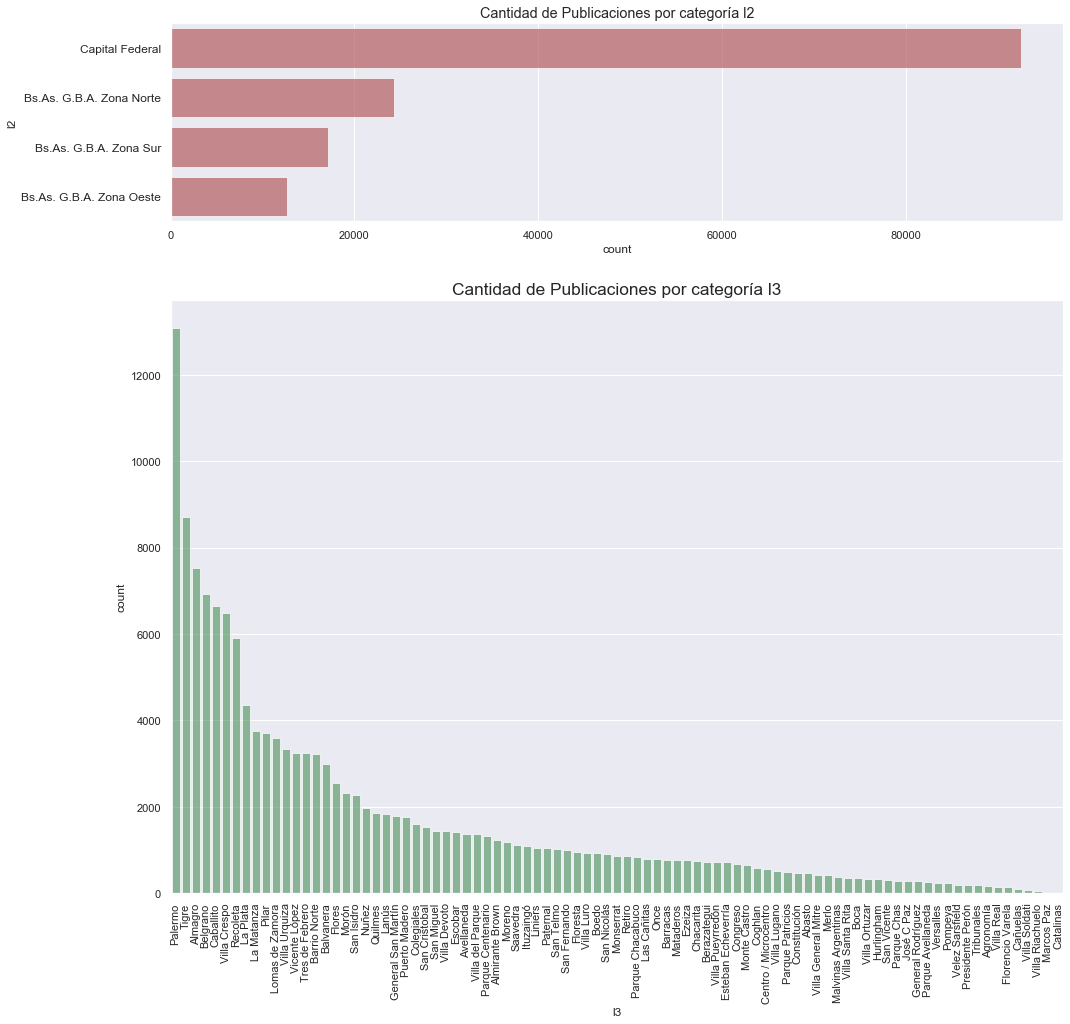

In [13]:
fig = plt.subplots(figsize=(16, 16), constrained_layout=True)
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1 = plt.subplot(gs[0])
sns.countplot(y= "l2",
              data= dataset, 
              order= dataset["l2"].value_counts().index,
              color= "r",
              alpha= 0.7,
              ax= ax1)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize= 'medium')
ax1.set_title("Cantidad de Publicaciones por categoría l2", fontsize= 'large')

ax2 = plt.subplot(gs[1])
sns.countplot(x= "l3",
              data= dataset,
              order= dataset["l3"].value_counts().index, 
              color= "g",
              alpha= 0.7,
              ax= ax2)
ax2.set_title("Cantidad de Publicaciones por categoría l3", fontsize= 'x-large')
plt.xticks(rotation= 90, fontsize= 11, horizontalalignment= 'center')

plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [14]:
dataset2 = dataset[((dataset['property_type'] == "Departamento") |
                  (dataset['property_type'] == "Casa") |
                  (dataset['property_type'] == "PH")) 
                  & (dataset['l2'] == "Capital Federal")] 

dataset2.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

**Distribuciones individuales:**

C:\Users\usuario\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\usuario\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


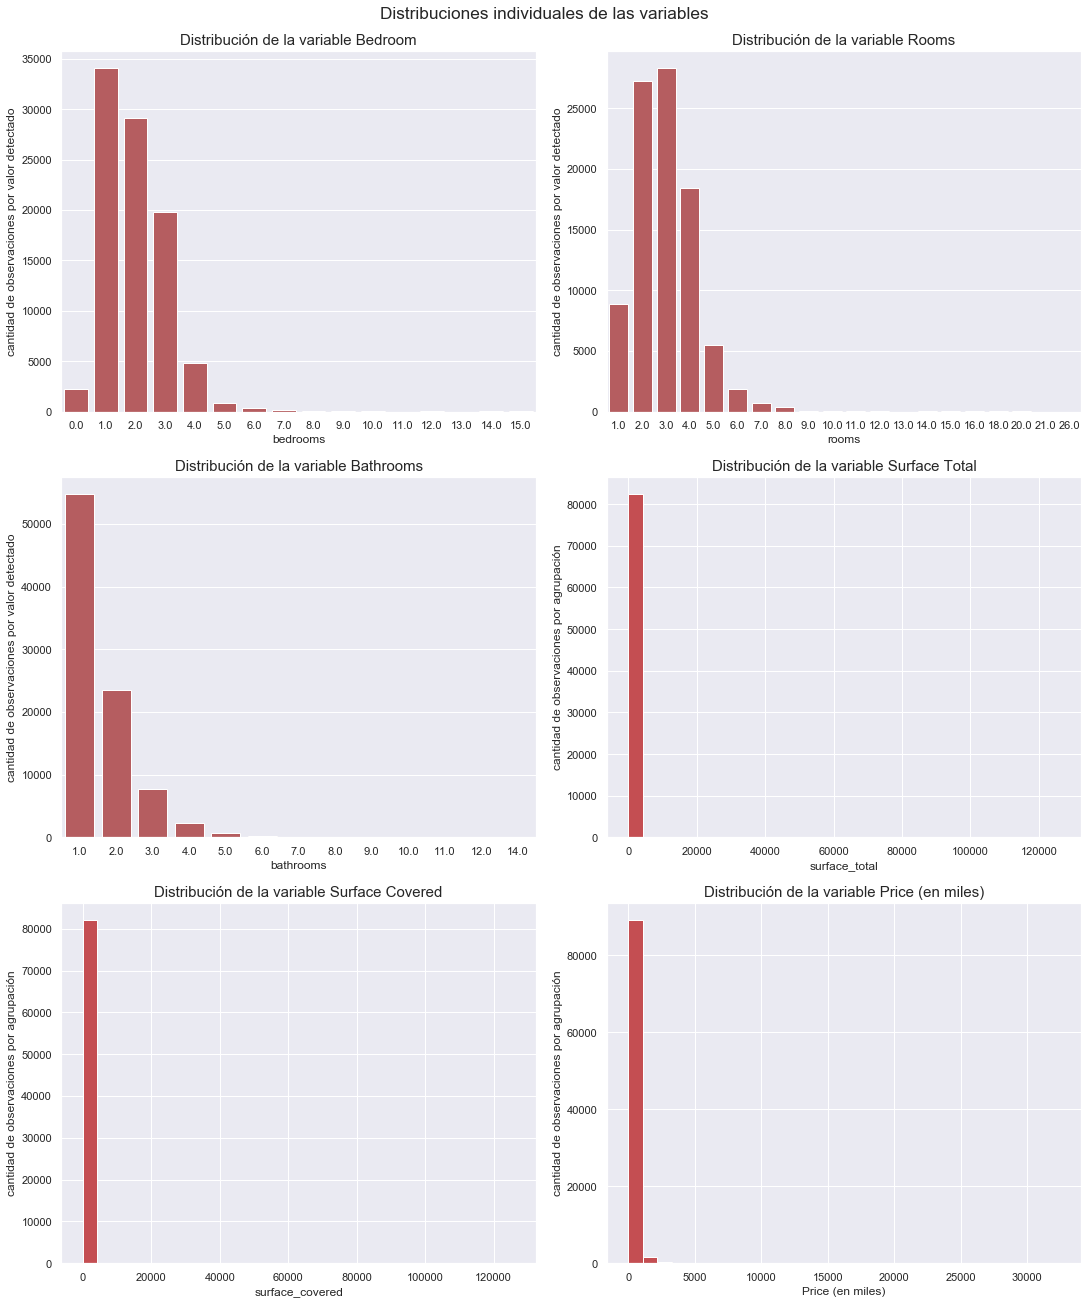

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15,18), constrained_layout=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

sns.countplot(dataset2["bedrooms"],
              color="r",
              ax=ax1)
ax1.set_ylabel('cantidad de observaciones por valor detectado')
ax1.set_title("Distribución de la variable Bedroom", fontdict={"fontsize":15})

sns.countplot(dataset2["rooms"],
              color="r",
              ax=ax2)
ax2.set_ylabel('cantidad de observaciones por valor detectado')
ax2.set_title("Distribución de la variable Rooms", fontdict={"fontsize":15})

sns.countplot(dataset2["bathrooms"],
              color="r",
              ax=ax3)
ax3.set_ylabel('cantidad de observaciones por valor detectado')
ax3.set_title("Distribución de la variable Bathrooms", fontdict={"fontsize":15})

ax4.hist(dataset2["surface_total"],
        color= "r", bins=30)
ax4.set_ylabel('cantidad de observaciones por agrupación')
ax4.set_xlabel('surface_total')
ax4.set_title("Distribución de la variable Surface Total", fontdict={"fontsize":15})

ax5.hist(dataset2["surface_covered"],
        color="r", bins=30)
ax5.set_ylabel('cantidad de observaciones por agrupación')
ax5.set_xlabel('surface_covered')
ax5.set_title("Distribución de la variable Surface Covered", fontdict={"fontsize":15})

ax6.hist(dataset2["price"]/1000,
        color="r", bins=30)
ax6.set_ylabel('cantidad de observaciones por agrupación')
ax6.set_xlabel('Price (en miles)')
ax6.set_title("Distribución de la variable Price (en miles)", fontdict={"fontsize":15})

fig.suptitle("Distribuciones individuales de las variables", size= "x-large")

plt.show()

# Los warnings surgen dado que las variables "surface_covered" y "surface_total" se encuentran con valores nulos o NA.

Como no me gusta como se ven los valores de price, reexpresaré los valores con una métrica distinta (al dividirlos por 1000), de esta manera, los precios estarán expresados en miles. Llamaré a esta nueva variable price_thousands.

In [16]:
dataset2 = dataset2.copy()
dataset2["price_thousands"] = dataset2["price"]/1000
dataset2.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5  2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   

                l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0  Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
1  Capital Federal          Boedo    2.0       1.0        2.0           70.0   
2  Capital Federal        Palermo    2.0       1.0        1.0           45.0   
3  Capital Federal        Palermo    2.0       1.0        1.0           85.0   
5  Capital Federal   Villa Crespo    2.0       1.0        1.0           56.0   

   surface_covered     price currency  \
0            140.0  153000.0      USD   
1             58.0  159000.0      USD   
2             45.0  125000.0      USD   
3             50.0  295000.0      USD   
5             56.0  150000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5  Depto.tipo casa de 2 ambientes en Venta en Vil...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5  Excelente ph solo 2 unidades, no paga expensas...            PH   

  operation_type  price_thousands  
0          Venta            153.0  
1          Venta            159.0  
2          Venta            125.0  
3          Venta            295.0  
5          Venta            150.0

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad.

Genero un pairplot para analizar la **distribución de cada variable individualmente**, los cuales se ubican en la **diagonal principal** de la matriz de gráficos. 

Mientras que **fuera de esta**, podremos observar las relaciones entre las variables una a una, es decir, su **distribución conjunta**.

<Figure size 864x864 with 0 Axes>

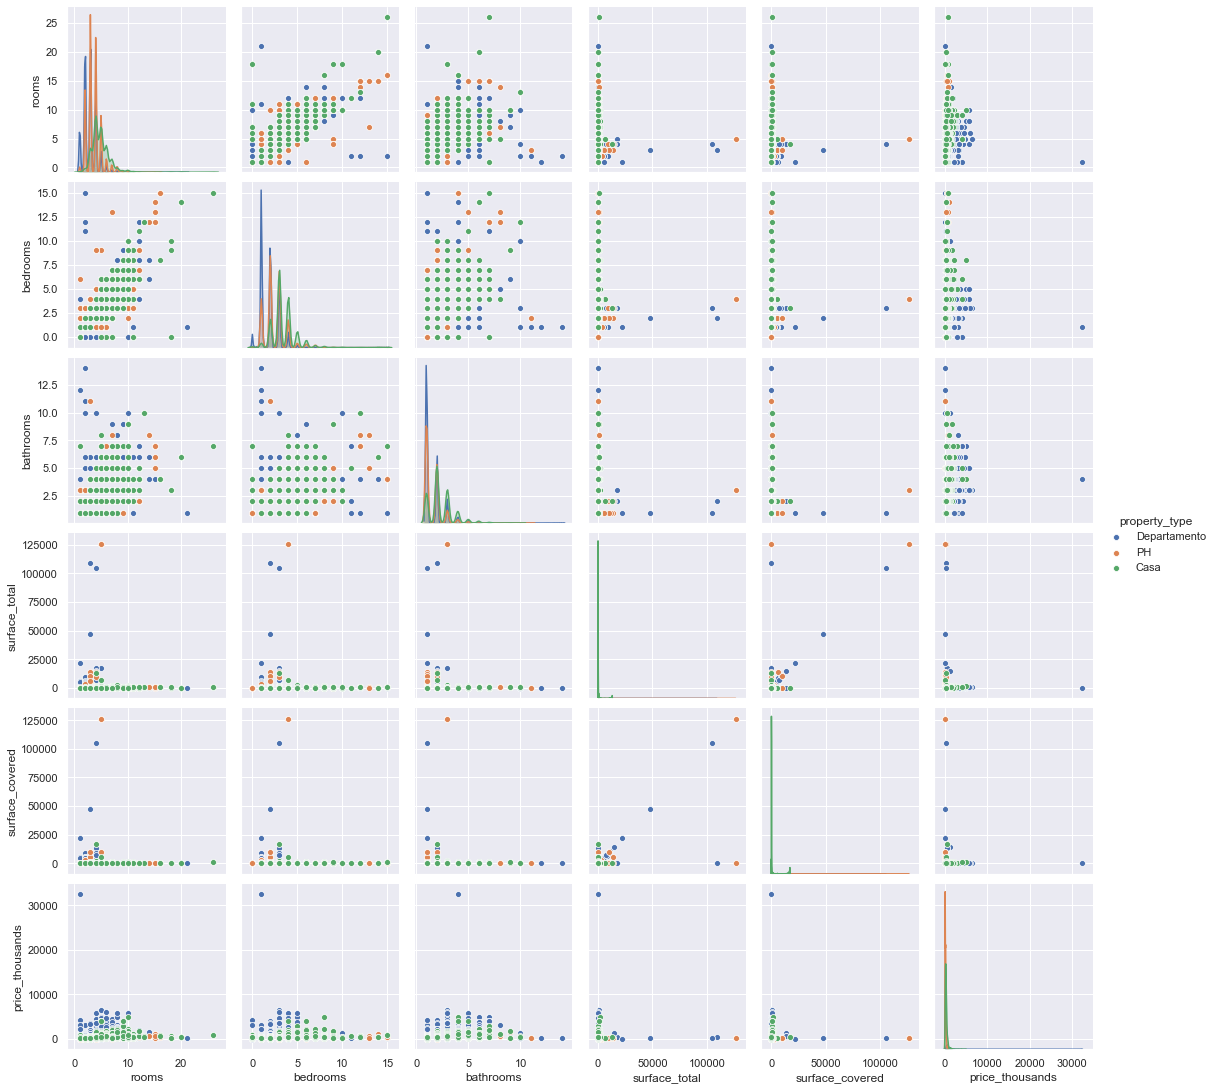

In [17]:
fig = plt.figure(figsize=(12,12))

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price_thousands", "property_type"]
sns.pairplot(dataset2[columns], hue="property_type")

plt.show()

### Ejercicio: 6. Distribuciones y relaciones de a pares

A. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

In [18]:
columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price_thousands"]
dataset2[columns].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  89314.000000   82568.000000   
mean       2.964278      1.960278      1.560147     112.626369   
std        1.314704      1.072946      0.860309     980.713664   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered  price_thousands  
count     82250.000000     91485.000000  
mean         94.966310       259.500258  
std         778.515243       322.265441  
min           1.000000         6.000000  
25%          44.000000       120.000000  
50%          63.000000       175.000000  
75%          96.000000       279.000000  
max      126062.000000     32434.232000

#### Respuesta:
Habría que analizar las siguientes variables:
1. Las propiedades que no tengan bedrooms.
1. Ver si el valor de 14 bathrooms es un outlier.
1. 126062 es un valor atipico casi de manera segura para tanto surface_covered como surface_total.
1. Ver si el valor de 26 rooms es un outlier.
1. Ver si el valor de 15 bedrooms es un outlier.

In [19]:
# 1. Analizar las propiedades que no tengan bedrooms
dataset2[dataset2["bedrooms"] == 0]["property_type"].value_counts()

Departamento    2200
Casa              12
PH                 5
Name: property_type, dtype: int64

In [20]:
dataset2[dataset2["bedrooms"] == 0]["rooms"].value_counts().sort_index()

1.0     2181
2.0       12
3.0       12
4.0        3
5.0        1
6.0        1
7.0        2
10.0       1
11.0       2
18.0       2
Name: rooms, dtype: int64

In [21]:
dataset2[(dataset2["rooms"] == 1) & (dataset2["bedrooms"] == 0)].sample(10)

start_date    end_date  created_on        lat        lon         l1  \
40465  2019-05-11  2019-07-10  2019-05-11 -34.637668 -58.491903  Argentina   

                    l2          l3  rooms  bedrooms  bathrooms  surface_total  \
40465  Capital Federal  Villa Luro    1.0       0.0        NaN           35.0   

       surface_covered    price currency                  title  \
40465             32.0  87000.0      USD  DEPARTAMENTO EN VENTA   

                                             description property_type  \
40465  Xintel (MLM-MLM-17) Venta de Departamento MONO...  Departamento   

      operation_type  price_thousands  
40465          Venta             87.0

### Respuesta:
Cuando "rooms" = 1 y "bedrooms" = 0, se tratan de **"monoambientes"** en su mayoría.

Aunque llama la atención las propiedades con dos ambientes y sin bedrooms.

In [183]:
dataset2[(dataset2["rooms"] > 1) & (dataset2["bedrooms"] == 0)].sample(10)

start_date    end_date  created_on        lat        lon         l1  \
123376  2019-11-22  9999-12-31  2019-11-22 -34.603714 -58.381581  Argentina   
65423   2020-01-22  9999-12-31  2020-01-22 -34.557155 -58.466241  Argentina   
106154  2020-01-18  9999-12-31  2020-01-18 -34.629831 -58.363725  Argentina   
28719   2019-11-11  9999-12-31  2019-11-11 -34.571736 -58.485982  Argentina   
100230  2019-11-12  9999-12-31  2019-11-12 -34.618986 -58.461856  Argentina   
100962  2019-11-12  9999-12-31  2019-11-12 -34.590871 -58.386654  Argentina   
120098  2019-12-05  9999-12-31  2019-12-05 -34.611912 -58.475513  Argentina   
101608  2019-11-12  9999-12-31  2019-11-12 -34.638503 -58.478803  Argentina   
58294   2019-11-13  9999-12-31  2019-11-13 -34.621940 -58.421950  Argentina   
100233  2019-11-12  9999-12-31  2019-11-12 -34.571161 -58.457066  Argentina   

                     l2                   l3  rooms  bedrooms  bathrooms  \
123376  Capital Federal          San Nicolás    5.0       0.0        2.0   
65423   Capital Federal             Belgrano    2.0       0.0        1.0   
106154  Capital Federal                 Boca   18.0       0.0        3.0   
28719   Capital Federal        Villa Urquiza    3.0       0.0        2.0   
100230  Capital Federal               Flores    3.0       0.0        1.0   
100962  Capital Federal               Retiro    4.0       0.0        2.0   
120098  Capital Federal  Villa General Mitre    7.0       0.0        3.0   
101608  Capital Federal    Parque Avellaneda    6.0       0.0        2.0   
58294   Capital Federal                Boedo    2.0       0.0        1.0   
100233  Capital Federal           Colegiales    3.0       0.0        2.0   

        surface_total  surface_covered     price currency  \
123376            NaN              NaN  350000.0      USD   
65423             NaN              NaN  109000.0      USD   
106154            NaN              NaN  240000.0      USD   
28719             NaN              NaN  290000.0      USD   
100230            NaN              NaN  180000.0      USD   
100962            NaN              NaN  380000.0      USD   
120098            NaN              NaN  350000.0      USD   
101608            NaN              NaN  430000.0      USD   
58294             NaN              NaN   80000.0      USD   
100233            NaN              NaN  320000.0      USD   

                                                    title  \
123376  Casa en Venta en Echeverria del lago,  countri...   
65423                               2 AMB | VIDAL al 2900   
106154  Hotel Comercial - Numerosos Ambientes! - Visit...   
28719   DEPARTAMENTO 3 AMBIENTES EN EDIF.  TORRE EN VI...   
100230  Departamento en Venta en Flores,  capital fede...   
100962  Departamento en Venta en Recoleta,  capital fe...   
120098  Casa en Venta en Villa gral.mitre,  capital fe...   
101608  Casa en Venta en Parque avellaneda,  capital f...   
58294   Departamento en Venta en Boedo, Capital federa...   
100233  Departamento en Venta en Colegiales,  capital ...   

                                              description property_type  \
123376                             \n\n XINTEL(CSP-CSP-3)          Casa   
65423   XINTEL(LGA-LGA-1742)  \r\nVenta de Departament...  Departamento   
106154  Sobre la Avenida Almirante Brown al 500 y haci...          Casa   
28719   Venta de Departamento 3 AMBIENTES en VILLA URQ...  Departamento   
100230  Hermoso edifico ubicado sobre una de las aveni...  Departamento   
100962  Departamento de 4 ambientes al frente en edifi...  Departamento   
120098  Casa con versatilidad de destinos en buen esta...          Casa   
101608  HERMOSO PH, Totalmente RECICLADO!!!\n\nLa unid...          Casa   
58294   VENTA DEPARTAMENTO 2 1/2 AMBIENTES BOEDO\nLumi...  Departamento   
100233  HERMOSO 3 AMBIENTES AL FRENTE CON COCHERA  (ab...  Departamento   

       operation_type  price_thousands  
123376          Venta            350.0  
65423           Venta            109.0  
106154  

### Respuesta:
En cambio, cuando la cantidad de rooms es mayor a 2, y la cantidad de bedrooms es 0, ya se pueden notar posibles errores de carga de datos.

In [23]:
# 2. Ver si el valor de 14 bathrooms es un outlier
dataset2["bathrooms"].value_counts().sort_index()

1.0     54801
2.0     23573
3.0      7645
4.0      2365
5.0       714
6.0       154
7.0        39
8.0         4
9.0         5
10.0        7
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

In [24]:
dataset2["bathrooms"].value_counts().sort_index()*100/len(dataset2["bathrooms"])

1.0     59.901623
2.0     25.767066
3.0      8.356561
4.0      2.585123
5.0      0.780456
6.0      0.168334
7.0      0.042630
8.0      0.004372
9.0      0.005465
10.0     0.007652
11.0     0.003279
12.0     0.001093
14.0     0.003279
Name: bathrooms, dtype: float64

In [184]:
dataset2[(dataset2["bathrooms"] > 4) & (dataset2["property_type"] == "Departamento")].sample(10)

start_date    end_date  created_on        lat        lon         l1  \
3700    2019-03-18  2019-06-23  2019-03-18 -34.567086 -58.435270  Argentina   
138932  2019-07-31  2019-11-22  2019-07-31 -34.595722 -58.384164  Argentina   
106153  2020-01-18  9999-12-31  2020-01-18 -34.607718 -58.387763  Argentina   
141791  2019-07-31  2019-09-04  2019-07-31        NaN        NaN  Argentina   
2862    2019-09-21  2019-10-27  2019-09-21 -34.603934 -58.364366  Argentina   
138663  2019-07-31  2019-08-14  2019-07-31        NaN        NaN  Argentina   
133035  2019-02-13  2019-06-23  2019-02-13        NaN        NaN  Argentina   
27026   2019-08-01  2019-08-14  2019-08-01 -34.587383 -58.397276  Argentina   
141807  2019-07-31  2019-08-14  2019-07-31 -34.548223 -58.455886  Argentina   
53629   2019-05-03  2019-06-23  2019-05-03 -34.566478 -58.434100  Argentina   

                     l2             l3  rooms  bedrooms  bathrooms  \
3700    Capital Federal    Las Cañitas    6.0       4.0        5.0   
138932  Capital Federal   Barrio Norte    6.0       5.0        5.0   
106153  Capital Federal    San Nicolás   12.0      11.0        7.0   
141791  Capital Federal       Belgrano    8.0       5.0        5.0   
2862    Capital Federal  Puerto Madero    4.0       3.0        5.0   
138663  Capital Federal       Belgrano    5.0       4.0        6.0   
133035  Capital Federal  Puerto Madero    4.0       3.0        5.0   
27026   Capital Federal       Recoleta    5.0       4.0        5.0   
141807  Capital Federal          Nuñez    5.0       4.0        5.0   
53629   Capital Federal    Las Cañitas    5.0       4.0        6.0   

        surface_total  surface_covered      price currency  \
3700            222.0            200.0   890000.0      USD   
138932          383.0            323.0   680000.0      USD   
106153          240.0            240.0   370000.0      USD   
141791          510.0            432.0  1620000.0      USD   
2862            576.0            438.0  3300000.0      USD   
138663          390.0            320.0  2400000.0      USD   
133035          253.0            188.0  1900000.0      USD   
27026           253.0            234.0   880000.0      USD   
141807          455.0            435.0  3200000.0      USD   
53629           390.0            320.0  2600000.0      USD   

                                                    title  \
3700    6 AMBIENTES CON BALCÓN TERRAZA Y COCHERA FIJA ...   
138932  AV. SANTA FE 1200 - BARRIO NORTE (TRIPLEX APTO...   
106153  Departamento - San Nicolas - Gran Propiedad de...   
141791                                   11 DE SEPTIEMBRE   
2862    U$S 3.300.000 - 4 amb en Duplex 576  mts2 - Ma...   
138663           Torre La imprenta Exclusiva Unidad 390m2   
133035                  SLS Piso Alto 4 amb + dependencia   
27026   Espectacular Piso Reciclado! 254m2 + 2 cochera...   
141807   Av del Libertador 7000 - Nuñez - Capital Federal   
53629            Torre La imprenta Exclusiva Unidad 390m2   

                                              description property_type  \
3700    Excelente Dúplex de categoria, muy luminoso, e...  Departamento   
138932  Magnifico triplex de 383m2 totales con terraza...  Departamento   
106153  LIBRE YA!!  lo maneja Leo<br><br>IDEAL INVERSI...  Departamento   
141791  Departamento estilo casa. Amplias terrazas, pa...  Departamento   
2862    MADERO CENTER.Pierina Daelessi 500Puerto Mader...  Departamento   
138663  Impecable 5 ambientes a estrenar en edificio L...  Departamento   
133035  SLSExclusiva unidad de 3 dormitorios en suite ...  Departamento   
27026   Excelente piso tipo casa Frente y contrafrente...  Departamento   
141807  Lujoso departamento ubicado en una de las mejo...  Departamento   
53629   Impecable 5 ambientes a estrenar en edificio L...  Departamento   

       operation_type  price_thousands  
3700            Venta            890.0  
138932          Venta            680.0  
106153          Venta            370.0  
141791          Venta 

### Respuesta:
Claramente cualquier propiedad con una cantidad mayor de 4 baños, son valores outliers que pueden dificultar nuestra estimación, dado que hay errores en cargas de datos y propiedades tipo "torre", "edificio", "piso" clasificadas como "Departamento".

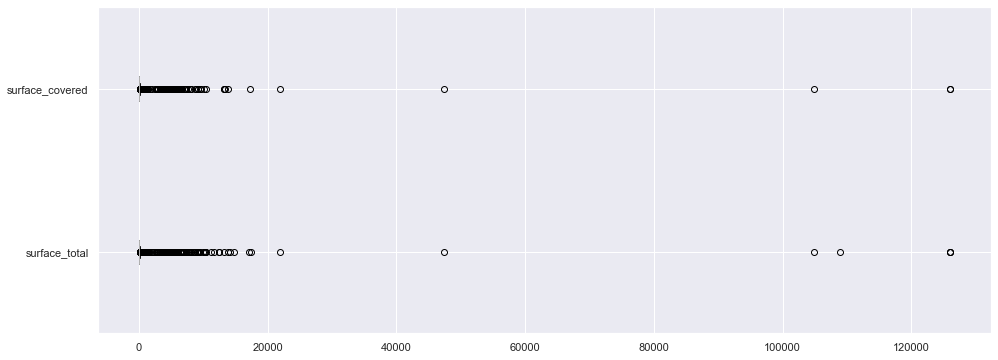

In [26]:
# 126062 es un valor atipico casi de manera segura para tanto surface_covered como surface_total
fig = plt.figure(figsize=(16,6))
dataset2.boxplot(column=["surface_total", "surface_covered"], vert=False)

### Respuesta:
Evidentemente, 126062 es un valor atipico para tanto surface_covered como surface_total, dada la información brindada por los boxplots.

In [27]:
# Ver si el valor de 26 rooms es un outlier

dataset2["rooms"].value_counts().sort_index()

1.0      8842
2.0     27249
3.0     28327
4.0     18414
5.0      5461
6.0      1824
7.0       710
8.0       405
9.0        80
10.0       80
11.0       29
12.0       35
13.0        2
14.0        4
15.0        7
16.0        5
18.0        4
20.0        4
21.0        1
26.0        2
Name: rooms, dtype: int64

In [28]:
dataset2["rooms"].value_counts().sort_index()*100/len(dataset2["rooms"])

1.0      9.664972
2.0     29.785211
3.0     30.963546
4.0     20.127890
5.0      5.969285
6.0      1.993769
7.0      0.776084
8.0      0.442696
9.0      0.087446
10.0     0.087446
11.0     0.031699
12.0     0.038258
13.0     0.002186
14.0     0.004372
15.0     0.007652
16.0     0.005465
18.0     0.004372
20.0     0.004372
21.0     0.001093
26.0     0.002186
Name: rooms, dtype: float64

### Respuesta

Las instancias con valores de rooms > 6 son muy poco representativas para nuestra predicción.

In [29]:
# Ver si el valor de 15 bedrooms es un outlier

dataset2["bedrooms"].value_counts().sort_index()

0.0      2217
1.0     34092
2.0     29110
3.0     19786
4.0      4862
5.0       830
6.0       319
7.0       177
8.0        35
9.0        17
10.0       13
11.0        4
12.0        9
13.0        2
14.0        6
15.0        6
Name: bedrooms, dtype: int64

In [30]:
dataset2["bedrooms"].value_counts().sort_index()*100/len(dataset2["bedrooms"])

0.0      2.423348
1.0     37.265125
2.0     31.819424
3.0     21.627589
4.0      5.314532
5.0      0.907253
6.0      0.348691
7.0      0.193474
8.0      0.038258
9.0      0.018582
10.0     0.014210
11.0     0.004372
12.0     0.009838
13.0     0.002186
14.0     0.006558
15.0     0.006558
Name: bedrooms, dtype: float64

### Respuesta

Las instancias con valores de bedrooms > 4 son muy poco representativas para nuestra predicción.

### Ejercicio: 6. Distribuciones y relaciones de a pares

B. Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

C. Lo mismo ocurre con valores de superficie total muy chico.

### Respuesta:

Trabajaré con cada tipo de propiedad por separado para tener una mejor segmentación de los datos.

Filtraré los valores outliers que se observan fuera de los límites o "bigotes" de los Boxplot.

In [31]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.75) - dataset2["surface_total"].quantile(0.25)) 
    limite_min = dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.25) - (ric * 1.5)
    limite_max = dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"RIC:{ric}")
    print(f"Limite máximo surface_total: {limite_max}")
    print(f"Limite mínimo surface_total: {limite_min}")

Departamento
RIC:50.0
Limite máximo surface_total: 174.0
Limite mínimo surface_total: -28.0
Casa
RIC:281.0
Limite máximo surface_total: 751.5
Limite mínimo surface_total: -257.5
PH
RIC:103.0
Limite máximo surface_total: 306.5
Limite mínimo surface_total: -84.5


### Respuesta:

El limite mínimo bajo cálculo del boxplot es negativo, por lo cual, no filtrará valores bajos. Entonces pasaré a filtrar por el cuantil 0.01 a los valores inferiores.

In [32]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.75) - dataset2["surface_total"].quantile(0.25))
    limite_min = dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.01)
    limite_max = dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"Limite máximo surface_total: {limite_max}")
    print(f"Limite mínimo surface_total: {limite_min}")
    print(f"RIC:{ric}")

Departamento
Limite máximo surface_total: 174.0
Limite mínimo surface_total: 25.0
RIC:50.0
Casa
Limite máximo surface_total: 751.5
Limite mínimo surface_total: 56.0
RIC:281.0
PH
Limite máximo surface_total: 306.5
Limite mínimo surface_total: 35.0
RIC:103.0


### Respuesta:

Almacenaré estos límites en una lista y filtraré la base de acuerdo al tipo de propiedad bajo su respectivo límite.

In [33]:
limite_min = []
limite_max = []

for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.75) - dataset2["surface_total"].quantile(0.25))
    limite_min.append(dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.01))
    limite_max.append(dataset2[dataset2["property_type"]==i]["surface_total"].quantile(0.75) + (ric * 1.5))

Separo a la base por cada tipo de propiedad.

In [34]:
departamentos = dataset2[dataset2["property_type"]=="Departamento"]
casas = dataset2[dataset2["property_type"]=="Casa"]
PHs = dataset2[dataset2["property_type"]=="PH"]

Filtro a cada propiedad y analizo su nueva distribución.

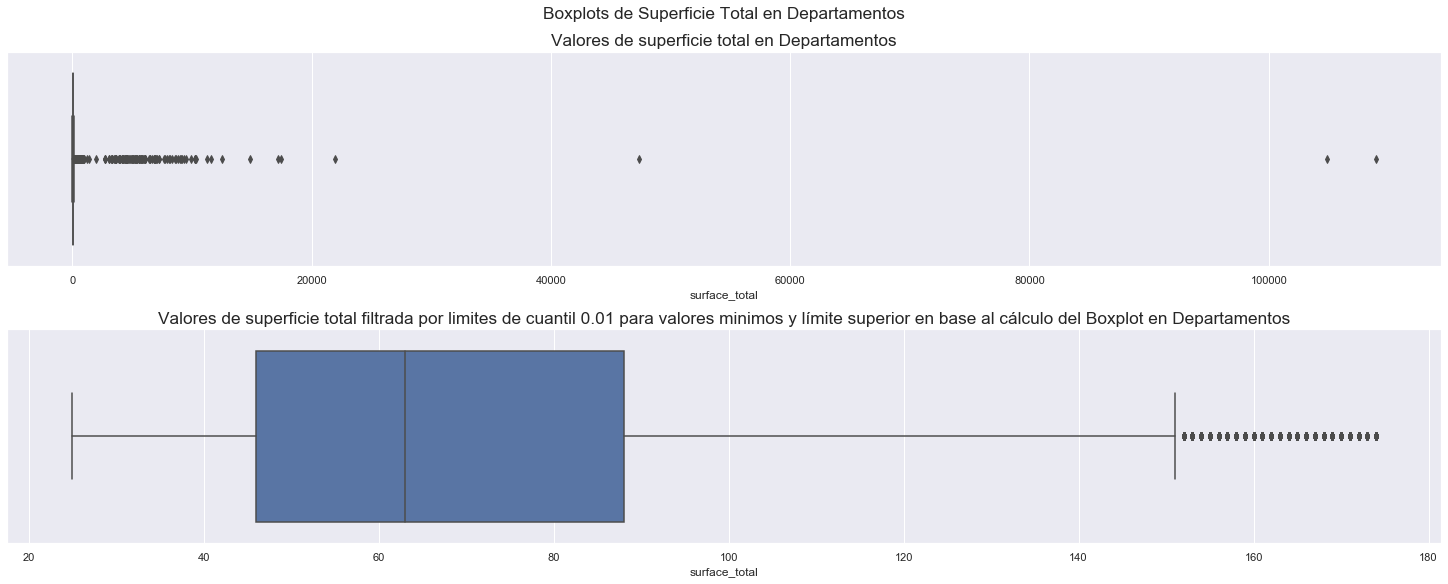

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

departamentos_clean = departamentos[(departamentos.surface_total <= limite_max[0]) &
                                    (departamentos.surface_total >= limite_min[0])]

fig.suptitle('Boxplots de Superficie Total en Departamentos', fontsize='x-large')

sns.boxplot(x = departamentos.surface_total,
            ax = ax1)

sns.boxplot(x = departamentos_clean.surface_total,
            ax = ax2)

ax1.set_title("Valores de superficie total en Departamentos", fontsize='x-large')
ax2.set_title("Valores de superficie total filtrada por limites de cuantil 0.01 para valores minimos y límite superior en base al cálculo del Boxplot en Departamentos",
              fontsize='x-large')
plt.show()

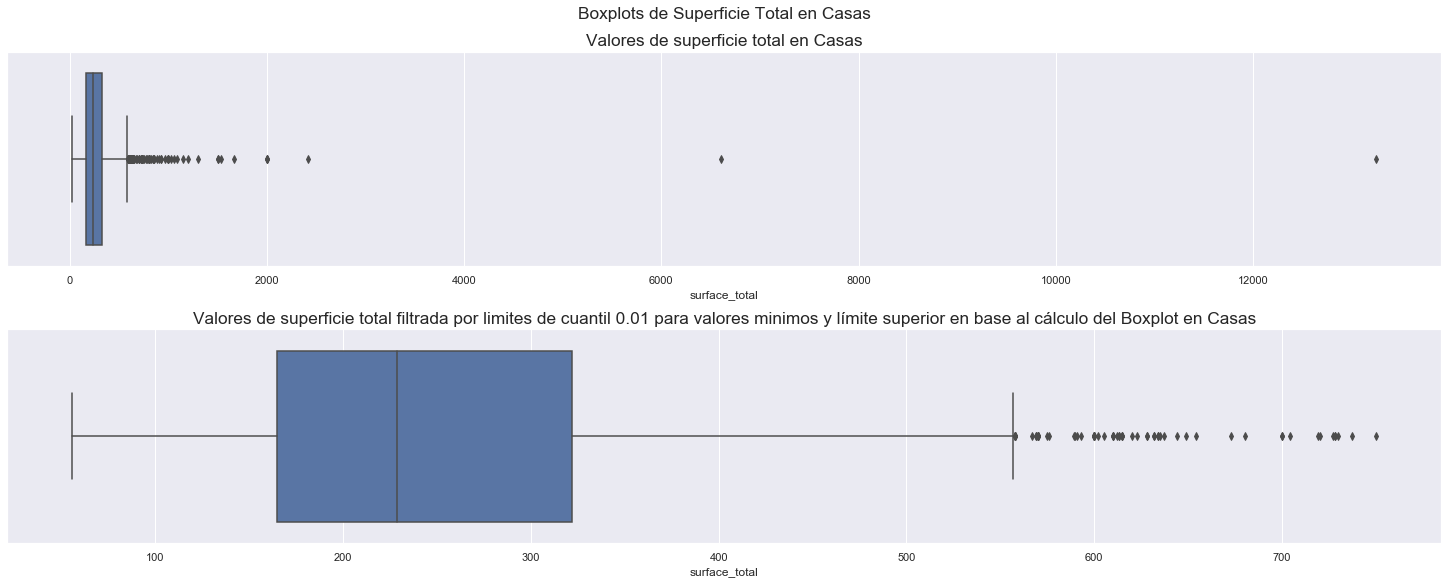

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

casas_clean = casas[(casas.surface_total <= limite_max[1]) &
                    (casas.surface_total >= limite_min[1])]

fig.suptitle('Boxplots de Superficie Total en Casas', fontsize='x-large')

sns.boxplot(x=casas.surface_total,
            ax = ax1)

sns.boxplot(x=casas_clean.surface_total,
            ax = ax2)

ax1.set_title("Valores de superficie total en Casas", fontsize='x-large')
ax2.set_title("Valores de superficie total filtrada por limites de cuantil 0.01 para valores minimos y límite superior en base al cálculo del Boxplot en Casas",
              fontsize='x-large')
plt.show()

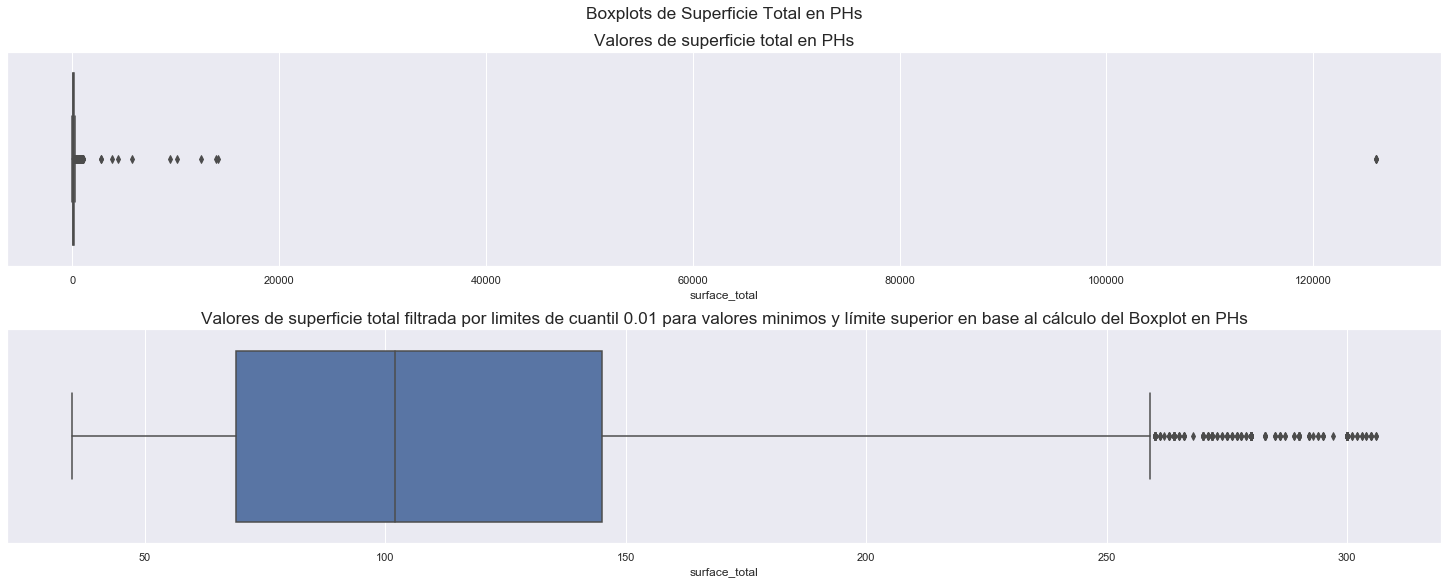

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

PHs_clean = PHs[(PHs.surface_total <= limite_max[2]) &
                (PHs.surface_total >= limite_min[2])]

fig.suptitle('Boxplots de Superficie Total en PHs', fontsize='x-large')

sns.boxplot(x=PHs.surface_total,
            ax = ax1)

sns.boxplot(x=PHs_clean.surface_total,
            ax = ax2)

ax1.set_title("Valores de superficie total en PHs", fontsize='x-large')
ax2.set_title("Valores de superficie total filtrada por limites de cuantil 0.01 para valores minimos y límite superior en base al cálculo del Boxplot en PHs",
              fontsize='x-large')
plt.show()

In [38]:
departamentos_clean = departamentos[(departamentos.surface_total <= limite_max[0]) &
                                    (departamentos.surface_total >= limite_min[0])]

casas_clean = casas[(casas.surface_total <= limite_max[1]) &
                    (casas.surface_total >= limite_min[1])]

PHs_clean = PHs[(PHs.surface_total <= limite_max[2]) &
                (PHs.surface_total >= limite_min[2])]

### Ejercicio:6. Distribuciones y relaciones de a pares

D. Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.

Concateno a las bases filtradas anteriormente.

In [39]:
lista = [departamentos_clean, casas_clean, PHs_clean]
dataset_clean = pd.concat(lista)
dataset_clean.head()

start_date    end_date  created_on        lat        lon         l1  \
0   2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
11  2019-10-17  2019-10-26  2019-10-17 -34.603683 -58.381557  Argentina   
12  2019-10-17  2019-12-19  2019-10-17 -34.630349 -58.417223  Argentina   
20  2019-10-17  2019-10-24  2019-10-17 -34.608246 -58.444262  Argentina   
22  2019-10-17  2019-11-13  2019-10-17 -34.626240 -58.462078  Argentina   

                 l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0   Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
11  Capital Federal          Boedo    2.0       1.0        1.0           68.0   
12  Capital Federal          Boedo    2.0       1.0        1.0           50.0   
20  Capital Federal         Abasto    2.0       1.0        1.0           31.0   
22  Capital Federal         Flores    2.0       1.0        1.0           45.0   

    surface_covered     price currency  \
0             140.0  153000.0      USD   
11             59.0  149000.0      USD   
12             44.0  115000.0      USD   
20             31.0   75000.0      USD   
22             45.0   95000.0      USD   

                                                title  \
0         ***Venta semipiso centro, ideal hostel*****   
11  Venta Departamento en Boedo Capital Federal Ga...   
12  Departamento dos ambientes tipo duplex - Venta...   
20     Departamento de 2 ambientes en Venta en Abasto   
22  Listo para mudarte- Excelente 2 ambientes ampl...   

                                          description property_type  \
0   DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
11  Departamento en Venta, 2 ambientes espectacula...  Departamento   
12  Amplio dos ambientes en duplex, 7 años de anti...  Departamento   
20  Lindo monoambiente duplex, 31 m2, living-comed...  Departamento   
22  Inmejorable ubicación a tan solo 2 cuadras del...  Departamento   

   operation_type  price_thousands  
0           Venta            153.0  
11          Venta            149.0  
12          Venta            115.0  
20          Venta             75.0  
22          Venta             95.0

In [40]:
dataset_clean.shape

(75966, 20)

In [41]:
dataset_clean['surface_covered'] = np.where(dataset_clean['surface_covered'] > dataset_clean['surface_total'], -1, dataset_clean['surface_covered'])     

In [42]:
dataset_clean = dataset_clean[dataset_clean['surface_covered'] > 0]

Mediante el bloque anterior, aplico que si el valor de "surface_covered" es mayor al "surface_total", se impute un -1 y luego me quedo con los valores positivos para dicha columna.

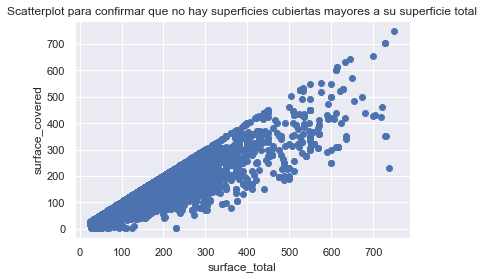

In [43]:
plt.scatter(x= dataset_clean['surface_total'],
            y= dataset_clean['surface_covered'])

plt.ylabel('surface_covered')
plt.xlabel('surface_total')

plt.title("Scatterplot para confirmar que no hay superficies cubiertas mayores a su superficie total")

plt.show()

In [44]:
dataset_clean[dataset_clean['surface_total']<dataset_clean['surface_covered']]

Empty DataFrame
Columns: [start_date, end_date, created_on, lat, lon, l1, l2, l3, rooms, bedrooms, bathrooms, surface_total, surface_covered, price, currency, title, description, property_type, operation_type, price_thousands]
Index: []

### Respuesta

Tal y como se espera, en el código anterior no arroja intancias en donde surface_covered > surface_total.

El paso siguiente es analizar las **distribuciones individuales** luego del filtro.

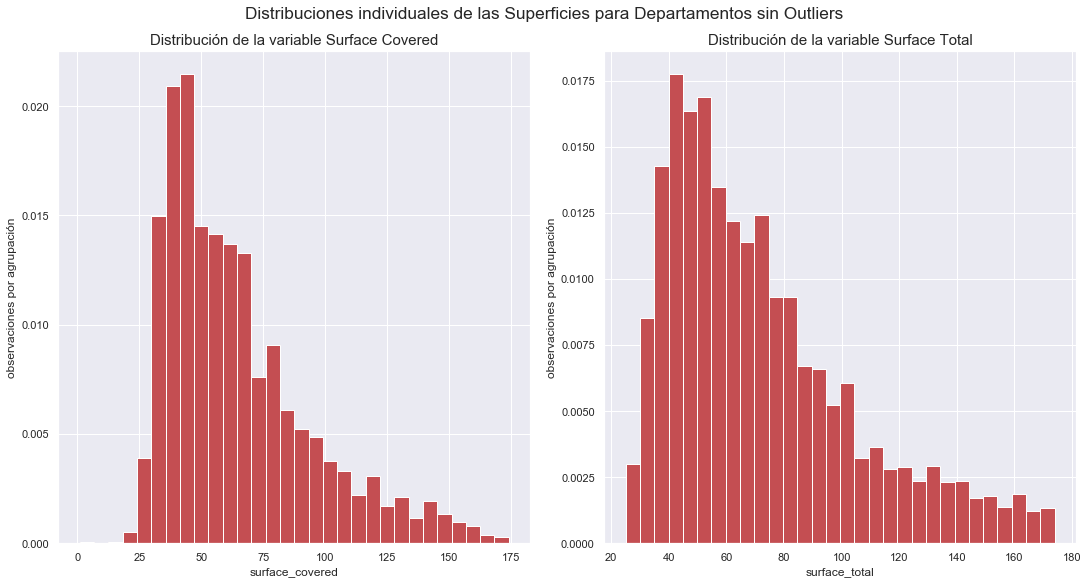

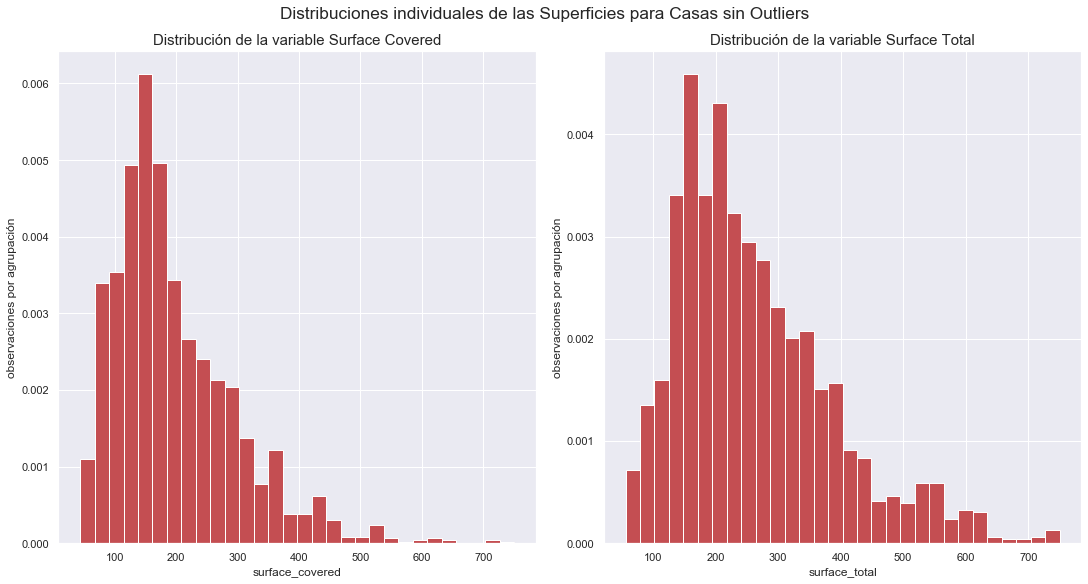

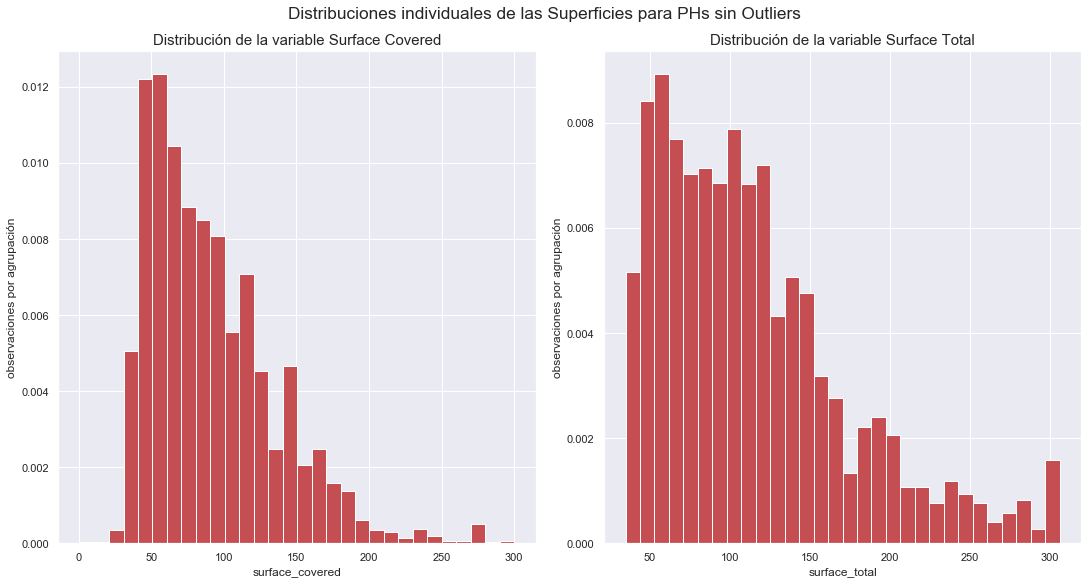

In [45]:
for i in ["Departamento", "Casa", "PH"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,8), constrained_layout=True)
    ax1, ax2 = axes.flatten()

    data1 = dataset_clean[dataset_clean["property_type"]==i]
    ax1.hist(x= data1["surface_covered"],
            color="r", 
            bins= 30,
            density= True)
    ax1.set_ylabel('observaciones por agrupación')
    ax1.set_xlabel('surface_covered')
    ax1.set_title("Distribución de la variable Surface Covered", fontdict={"fontsize":15})

    data2=dataset_clean[dataset_clean["property_type"]==i]
    ax2.hist(x= data2["surface_total"],
            color= "r", 
            bins= 30,
            density= True)
    ax2.set_ylabel('observaciones por agrupación')
    ax2.set_xlabel('surface_total')
    ax2.set_title("Distribución de la variable Surface Total", fontdict={"fontsize":15})

    fig.suptitle(f"Distribuciones individuales de las Superficies para {i}s sin Outliers", size= "x-large")

    plt.show()

### Ejercicio: 6. Distribuciones y relaciones de a pares

E. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

Tomo a la base generada anteriormente y la separo en cada tipo de propiedad

In [46]:
departamentos_clean = dataset_clean[dataset_clean["property_type"]=="Departamento"]
casas_clean = dataset_clean[dataset_clean["property_type"]=="Casa"]
PHs_clean = dataset_clean[dataset_clean["property_type"]=="PH"]

### Respuesta:
Analizaré las distribuciones de los precios en el dataset_clean creado recientemente

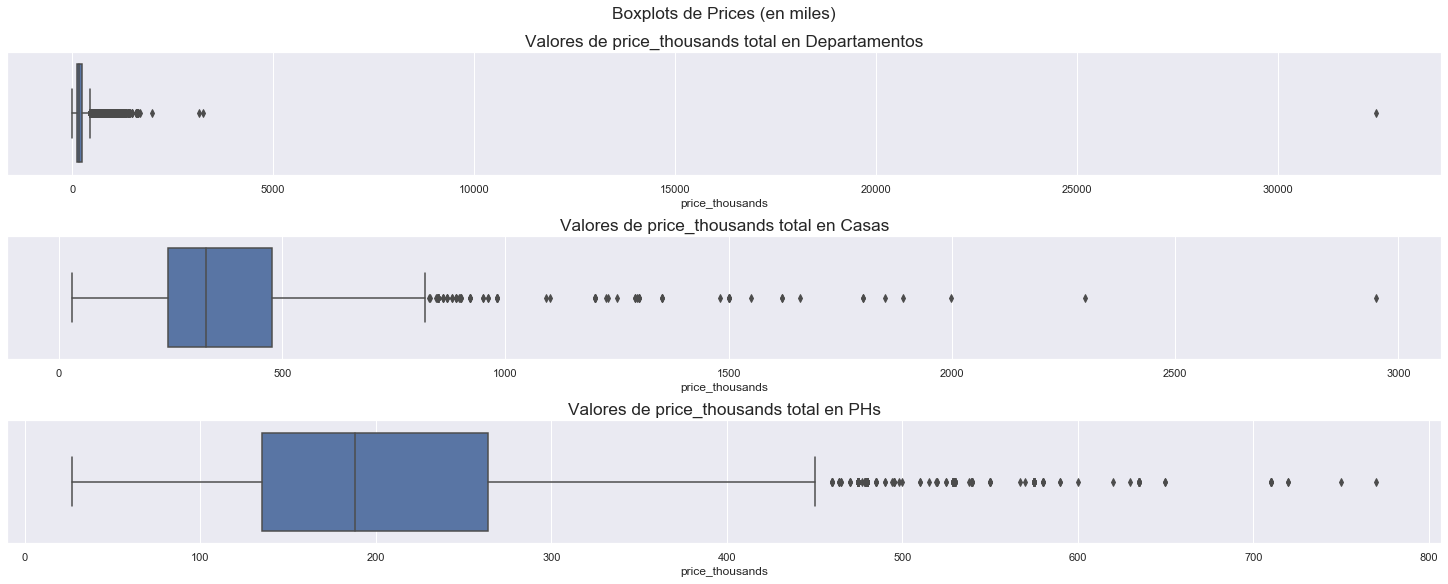

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 8), constrained_layout=True, sharex= False)


fig.suptitle('Boxplots de Prices (en miles)', fontsize='x-large')

sns.boxplot(x= departamentos_clean.price_thousands,
            ax = ax1)
sns.boxplot(x= casas_clean.price_thousands,
            ax = ax2)
sns.boxplot(x= PHs_clean.price_thousands,
            ax = ax3)

ax1.set_title("Valores de price_thousands total en Departamentos", fontsize= 'x-large')
ax2.set_title("Valores de price_thousands total en Casas", fontsize= 'x-large')
ax3.set_title("Valores de price_thousands total en PHs", fontsize= 'x-large')
plt.show()

### Respuesta:
Observaré los limites bajo la metodología aplicada anteriormente

In [48]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.75) - dataset_clean["price_thousands"].quantile(0.25)) 
    limite_min = dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.25) - (ric * 1.5)
    limite_max = dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"RIC:{ric}")
    print(f"Limite máximo:{limite_max}")
    print(f"Limite mínimo:{limite_min}")

Departamento
RIC:124.30000000000001
Limite máximo:431.75
Limite mínimo:-66.95000000000002
Casa
RIC:355.5
Limite máximo:1009.75
Limite mínimo:-289.3
PH
RIC:143.0
Limite máximo:478.5
Limite mínimo:-79.5


### Respuesta:

El limite mínimo bajo cálculo del boxplot es negativo, por lo cual, no filtrará valores bajos. Entonces pasaré a filtrar por el cuantil 0.01 a los valores inferiores.

In [49]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.75) - dataset_clean["price_thousands"].quantile(0.25))
    limite_min = dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.01)
    limite_max = dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"Limite máximo price_thousands:{limite_max}")
    print(f"Limite mínimo price_thousands:{limite_min}")
    print(f"RIC:{ric}")

Departamento
Limite máximo price_thousands:431.75
Limite mínimo price_thousands:62.0
RIC:124.30000000000001
Casa
Limite máximo price_thousands:1009.75
Limite mínimo price_thousands:99.0
RIC:355.5
PH
Limite máximo price_thousands:478.5
Limite mínimo price_thousands:70.0
RIC:143.0


In [50]:
limite_min = []
limite_max = []

for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.75) - dataset_clean["price_thousands"].quantile(0.25))
    limite_min.append(dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.01))
    limite_max.append(dataset_clean[dataset_clean["property_type"]==i]["price_thousands"].quantile(0.75) + (ric * 1.5))

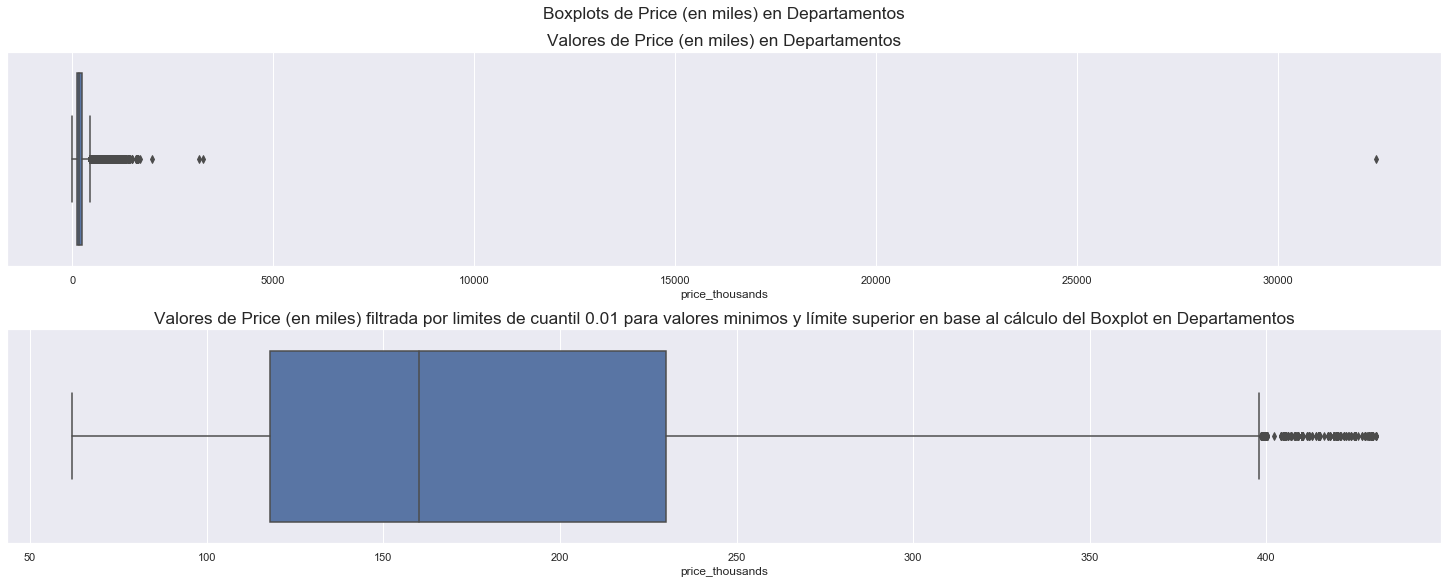

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

departamentos_clean2 = departamentos_clean[(departamentos_clean.price_thousands <= limite_max[0]) &
                                           (departamentos_clean.price_thousands >= limite_min[0])]

fig.suptitle('Boxplots de Price (en miles) en Departamentos', fontsize='x-large')

sns.boxplot(x=departamentos_clean.price_thousands,
            ax = ax1)

sns.boxplot(x=departamentos_clean2.price_thousands,
            ax = ax2)

ax1.set_title("Valores de Price (en miles) en Departamentos", fontsize='x-large')
ax2.set_title("Valores de Price (en miles) filtrada por limites de cuantil 0.01 para valores minimos y límite superior en base al cálculo del Boxplot en Departamentos",
              fontsize='x-large')

plt.show()

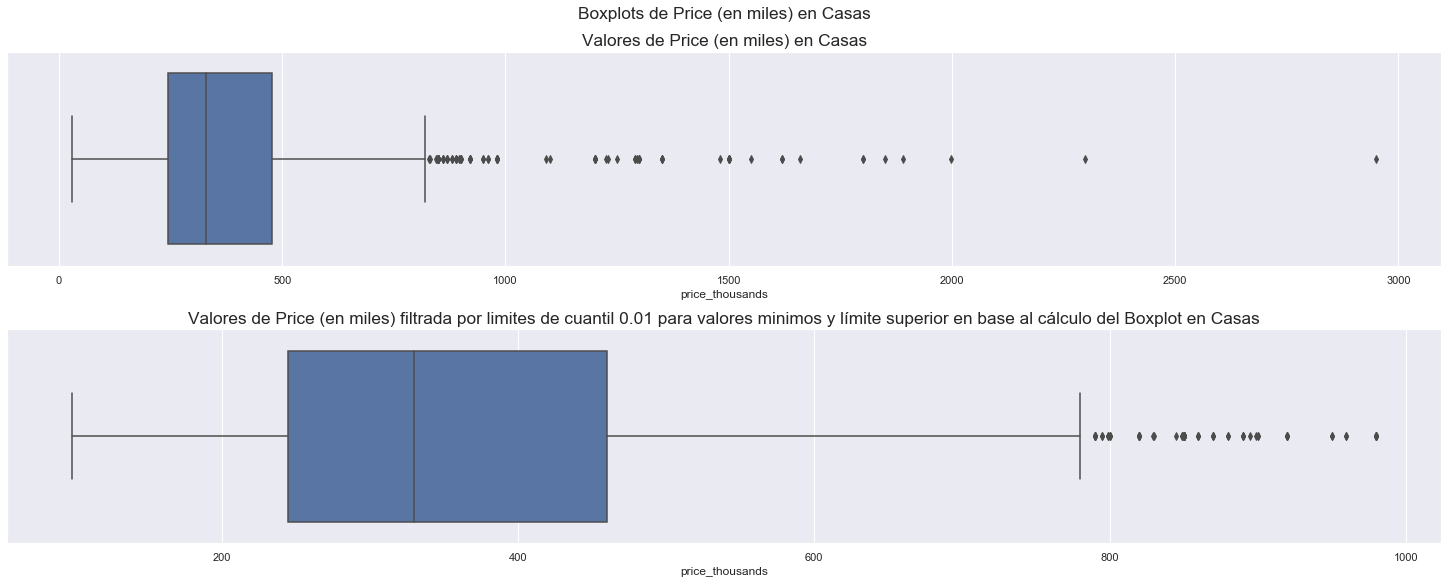

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

casas_clean2 = casas_clean[(casas_clean.price_thousands <= limite_max[1]) &
                           (casas_clean.price_thousands >= limite_min[1])]

fig.suptitle('Boxplots de Price (en miles) en Casas', fontsize='x-large')

sns.boxplot(x=casas_clean.price_thousands,
            ax = ax1)

sns.boxplot(x=casas_clean2.price_thousands,
            ax = ax2)

ax1.set_title("Valores de Price (en miles) en Casas", fontsize='x-large')
ax2.set_title("Valores de Price (en miles) filtrada por limites de cuantil 0.01 para valores minimos y límite superior en base al cálculo del Boxplot en Casas",
              fontsize='x-large')

plt.show()

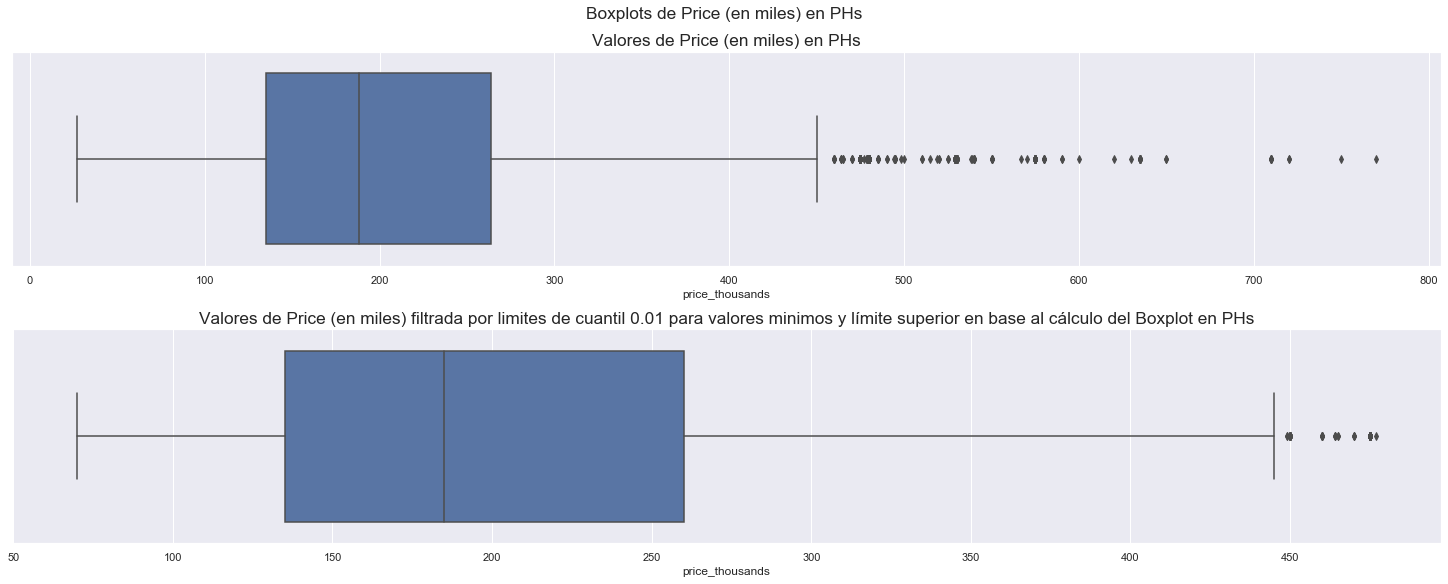

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

PHs_clean2 = PHs_clean[(PHs_clean.price_thousands <= limite_max[2]) &
                       (PHs_clean.price_thousands >= limite_min[2])]

fig.suptitle('Boxplots de Price (en miles) en PHs', fontsize='x-large')

sns.boxplot(x=PHs_clean.price_thousands,
            ax = ax1)

sns.boxplot(x=PHs_clean2.price_thousands,
            ax = ax2)

ax1.set_title("Valores de Price (en miles) en PHs", fontsize='x-large')
ax2.set_title("Valores de Price (en miles) filtrada por limites de cuantil 0.01 para valores minimos y límite superior en base al cálculo del Boxplot en PHs",
              fontsize='x-large')

plt.show()

Filtro la base de acuerdo al analisis anterior.

In [54]:
departamentos_clean2 = departamentos_clean[(departamentos_clean.price_thousands <= limite_max[0]) &
                                           (departamentos_clean.price_thousands >= limite_min[0])]

casas_clean2 = casas_clean[(casas_clean.price_thousands <= limite_max[1]) &
                           (casas_clean.price_thousands >= limite_min[1])]

PHs_clean2 = PHs_clean[(PHs_clean.price_thousands <= limite_max[2]) &
                       (PHs_clean.price_thousands >= limite_min[2])]

In [55]:
lista = [departamentos_clean2, casas_clean2, PHs_clean2]
dataset_clean = pd.concat(lista)
dataset_clean.head()

start_date    end_date  created_on        lat        lon         l1  \
0   2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
11  2019-10-17  2019-10-26  2019-10-17 -34.603683 -58.381557  Argentina   
12  2019-10-17  2019-12-19  2019-10-17 -34.630349 -58.417223  Argentina   
20  2019-10-17  2019-10-24  2019-10-17 -34.608246 -58.444262  Argentina   
22  2019-10-17  2019-11-13  2019-10-17 -34.626240 -58.462078  Argentina   

                 l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0   Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
11  Capital Federal          Boedo    2.0       1.0        1.0           68.0   
12  Capital Federal          Boedo    2.0       1.0        1.0           50.0   
20  Capital Federal         Abasto    2.0       1.0        1.0           31.0   
22  Capital Federal         Flores    2.0       1.0        1.0           45.0   

    surface_covered     price currency  \
0             140.0  153000.0      USD   
11             59.0  149000.0      USD   
12             44.0  115000.0      USD   
20             31.0   75000.0      USD   
22             45.0   95000.0      USD   

                                                title  \
0         ***Venta semipiso centro, ideal hostel*****   
11  Venta Departamento en Boedo Capital Federal Ga...   
12  Departamento dos ambientes tipo duplex - Venta...   
20     Departamento de 2 ambientes en Venta en Abasto   
22  Listo para mudarte- Excelente 2 ambientes ampl...   

                                          description property_type  \
0   DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
11  Departamento en Venta, 2 ambientes espectacula...  Departamento   
12  Amplio dos ambientes en duplex, 7 años de anti...  Departamento   
20  Lindo monoambiente duplex, 31 m2, living-comed...  Departamento   
22  Inmejorable ubicación a tan solo 2 cuadras del...  Departamento   

   operation_type  price_thousands  
0           Venta            153.0  
11          Venta            149.0  
12          Venta            115.0  
20          Venta             75.0  
22          Venta             95.0

In [56]:
dataset_clean.shape

(69885, 20)

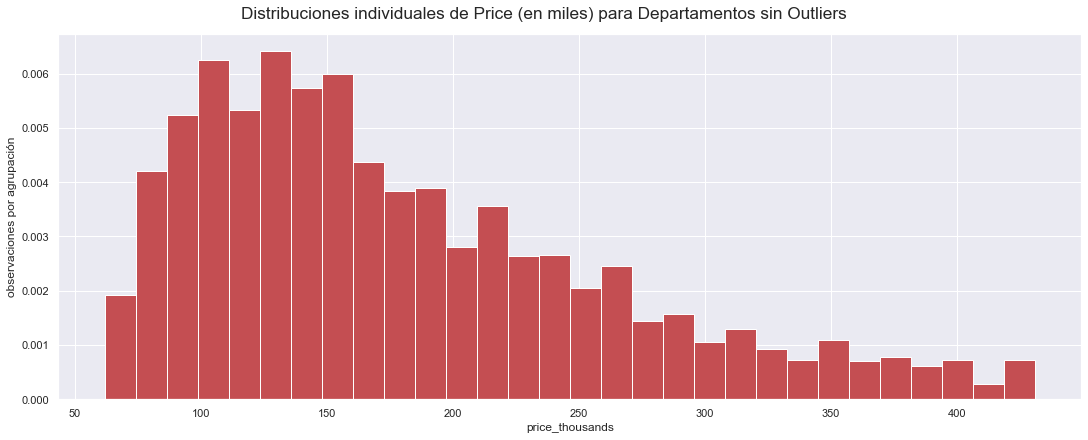

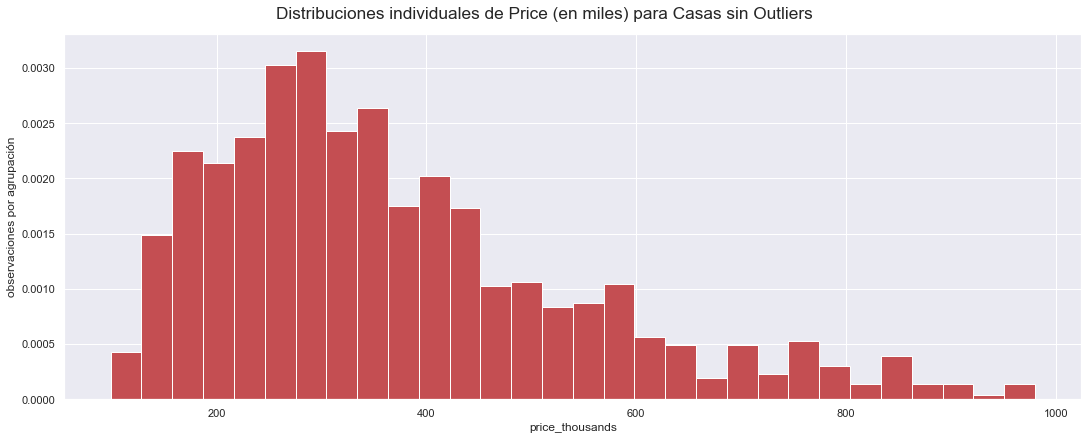

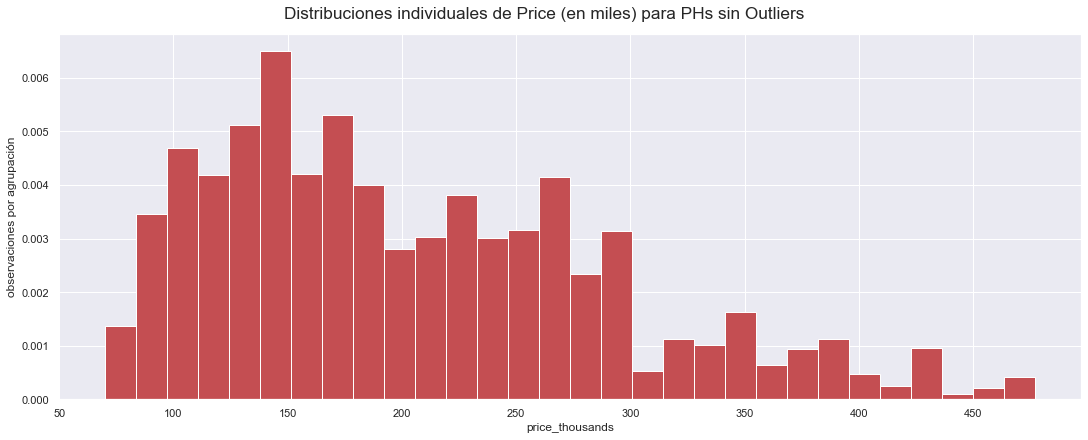

In [57]:
for i in ["Departamento", "Casa", "PH"]:
    fig, ax1 = plt.subplots(1,1,figsize=(15,6), constrained_layout=True)

    data1=dataset_clean[dataset_clean["property_type"]==i]
    ax1.hist(x=data1["price_thousands"],
            color="r", 
            bins=30,
            density= True)
    ax1.set_ylabel('observaciones por agrupación')
    ax1.set_xlabel('price_thousands')
    fig.suptitle(f"Distribuciones individuales de Price (en miles) para {i}s sin Outliers", size= "x-large")

    plt.show()

F. Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

<Figure size 864x864 with 0 Axes>

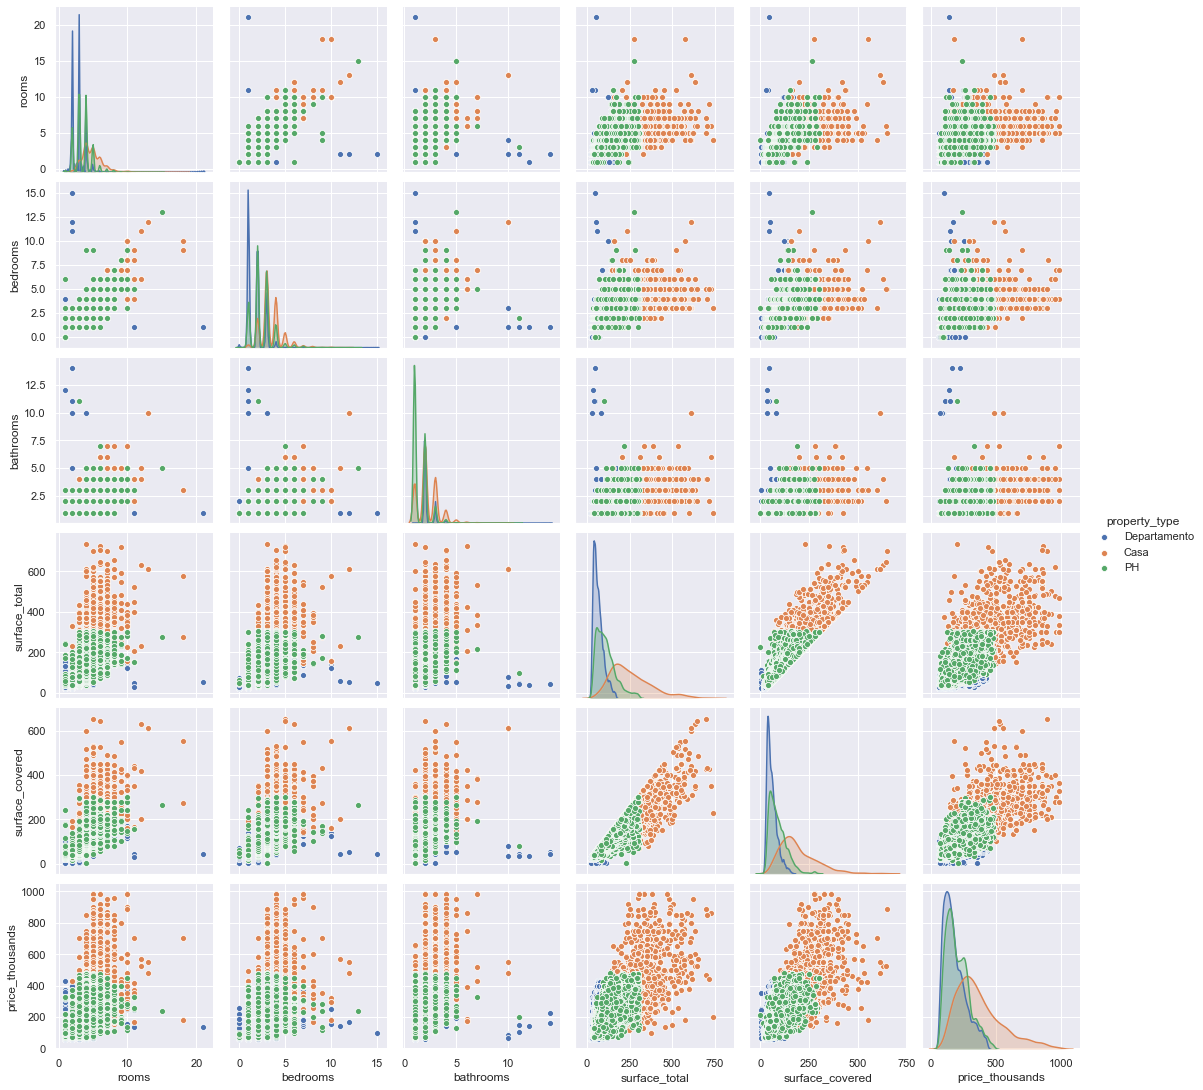

In [58]:
fig = plt.figure(figsize=(12,12))

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price_thousands", "property_type"]
sns.pairplot(dataset_clean[columns], hue="property_type")

plt.show()

## Filtrado personal 

Generaré un filtrado extra en base a lo observado para las variables rooms, bedrooms y bathrooms, dado que considero que  debo tener en cuenta las particularidades detalladas en la sección de análisis de los datos.

En primer lugar, dejaré fuera las instancias que no tienen observaciones y las instancias duplicadas para las variables que detectamos como importantes.

In [59]:
dataset_clean.shape

(69885, 20)

In [60]:
dataset_clean_personal = dataset_clean.copy()
dataset_clean_personal.shape

(69885, 20)

In [61]:
dataset_clean_personal.drop_duplicates(inplace= True)
dataset_clean_personal.shape

(68684, 20)

In [62]:
dataset_clean_personal.dropna(inplace= True)
dataset_clean_personal.shape

(64976, 20)

Las instancias con bedrooms = 0 y rooms > 2 las consideramos anteriormente como outliers.

In [63]:
dataset_clean_personal.drop(dataset_clean_personal[(dataset_clean_personal["bedrooms"] == 0) &
                                                   (dataset_clean_personal["rooms"] > 2)].index, 
                            inplace= True)
dataset_clean_personal.shape

(64976, 20)

Las instancias con bathrooms > 4 las consideramos anteriormente como outliers.

In [64]:
dataset_clean_personal.drop(dataset_clean_personal[dataset_clean_personal["bathrooms"] > 4].index, 
                            inplace= True)
dataset_clean_personal.shape

(64899, 20)

Las instancias con rooms > 6 las consideramos anteriormente como outliers.

In [65]:
dataset_clean_personal.drop(dataset_clean_personal[dataset_clean_personal["rooms"] > 6].index, 
                            inplace= True)
dataset_clean_personal.shape

(64453, 20)

Las instancias con bedrooms > 4 las consideramos anteriormente como outliers.

In [66]:
dataset_clean_personal.drop(dataset_clean_personal[dataset_clean_personal["bedrooms"] > 4].index, 
                            inplace= True)
dataset_clean_personal.shape

(64206, 20)

Las instancias con bathrooms > 1 mientras bedrooms = 0, las consideramos anteriormente como outliers.

In [67]:
dataset_clean_personal.drop(dataset_clean_personal[(dataset_clean_personal["bedrooms"]==0) &
                                                   (dataset_clean_personal["bathrooms"]>1)].index,
                           inplace= True)
dataset_clean_personal.shape

(64201, 20)

Presento la nueva base personal a través de un pairplot para verificar tanto la distribución individual de las variables, como también, las distribuciones conjuntas.

<Figure size 864x864 with 0 Axes>

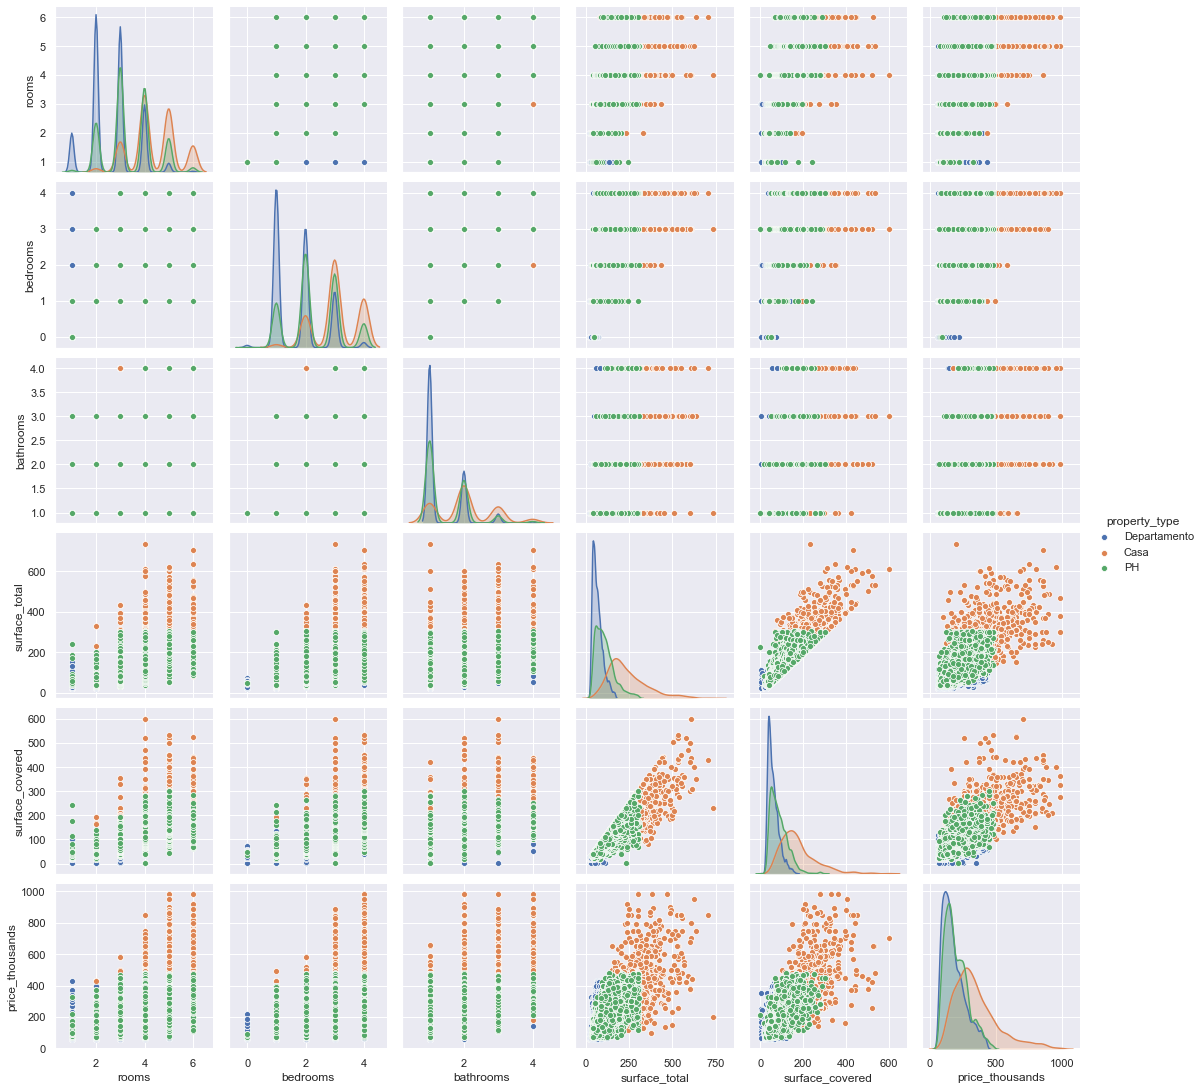

In [68]:
fig = plt.figure(figsize=(12,12))

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price_thousands", "property_type"]
sns.pairplot(dataset_clean_personal[columns], hue="property_type")

plt.show()
#plt.savefig('pairplot_filtro_personal.png')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

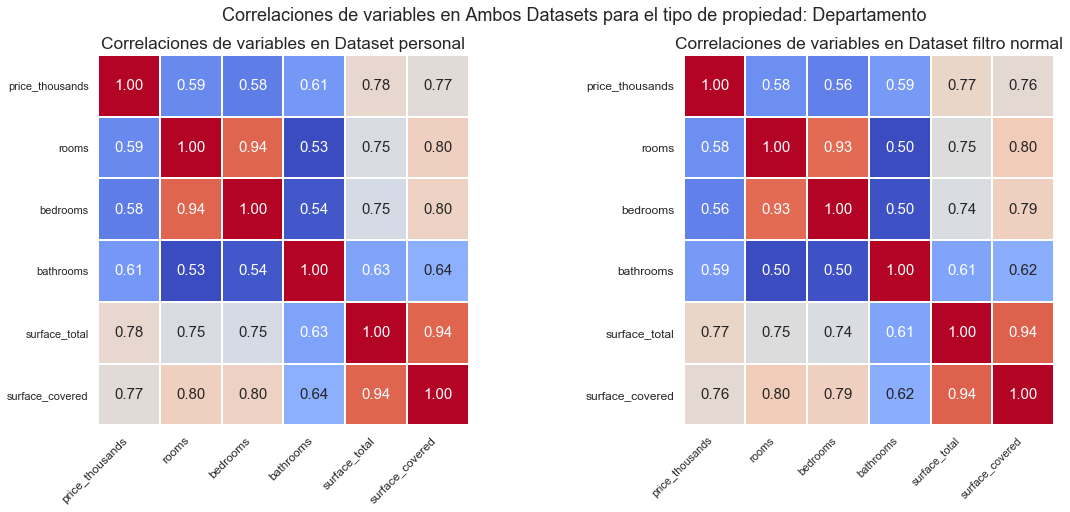

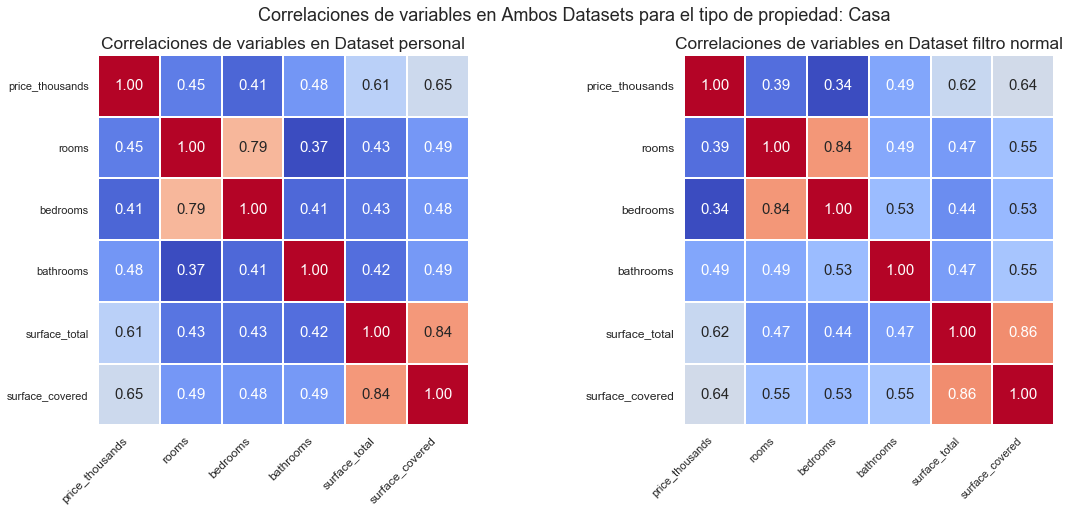

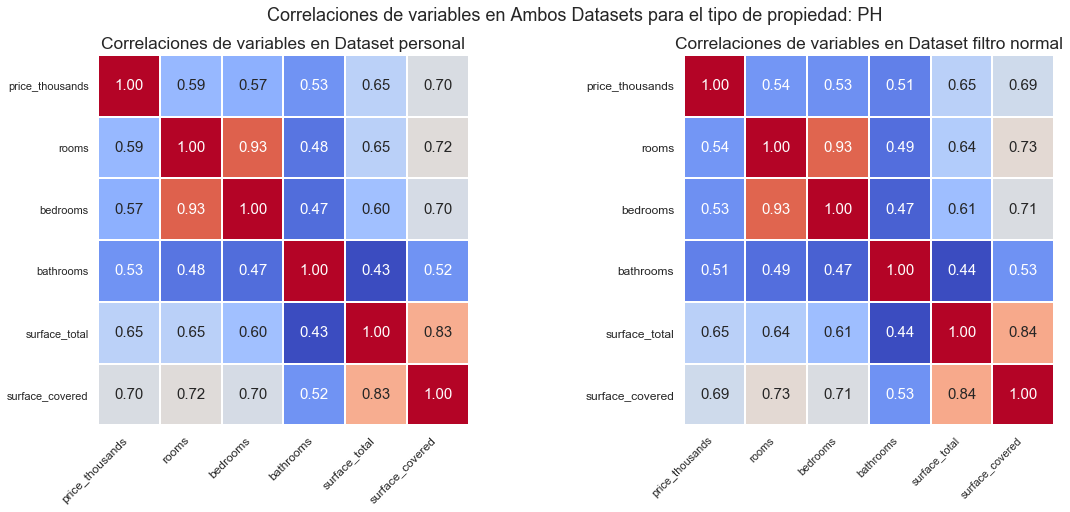

In [69]:
columns = ["price_thousands", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]

for tipo in ["Departamento", "Casa", "PH"]:
    fig, axes = plt.subplots(1,2, figsize=(16,7), constrained_layout=True)
    ax1, ax2 = axes.flatten()

    data = dataset_clean_personal[dataset_clean_personal["property_type"] == tipo]
    corr = data[columns].corr(method="pearson")
    sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
               cmap= 'coolwarm', linewidths=1, ax=ax1)
    ax1.set_xticklabels(data[columns].columns,rotation = 45, fontsize = 12,horizontalalignment= 'right')
    ax1.set_title("Correlaciones de variables en Dataset personal", fontsize='x-large')

    data = dataset_clean[dataset_clean["property_type"] == tipo]
    corr2 = data[columns].corr(method="pearson")
    sns.heatmap(corr2, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
               cmap= 'coolwarm', linewidths=1, ax=ax2)


    ax2.set_title("Correlaciones de variables en Dataset filtro normal", fontsize='x-large')
    ax2.set_yticklabels(data[columns].columns,rotation = 0, fontsize = 12)
    plt.xticks(rotation= 45, fontsize= 11, horizontalalignment= 'right')

    plt.suptitle(f"Correlaciones de variables en Ambos Datasets para el tipo de propiedad: {tipo}", fontsize=18)
    

### Respuesta:

Gracias a la matriz de correlacion vemos como es relativamente mas fácil predecir el valor de los departamentos por estas varibles en comparación con las casas y los PH. Esto se deduce por el mayor valor de correlación entre la variable "price_thousands" y el resto de las mismas.

De las 5 variables tomadas como candidatas a estimar el precio de los departamentos, el orden de importancia es: "surface_total", "surface_covered", "bathrooms", "rooms", "bedrooms".

Todas las correlaciones son positivas, lo cual es esperable dado que no tenemos variables del tipo "entre mas de x, menor es el precio".

La mayor correlación entre varaibles independientes para los departamentos se da en las variables "surface_total" y "surface_covered", lo cual es esperable dado que los departamentos suelen dejar mínimo el espacio no cubierto.

Debo destacar que en primera instancia parece que el filtrado personal en el dataset no mejora sustancialmente las correlaciones de las variables y el precio.  

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


#### Respuesta:
Para el desafío voy a calcular el precio promedio de departamentos de una habitación y un solo baño, por barrio para tener un proxy del valor de la ubicación en los precios

In [71]:
desafio = dataset_clean_personal[(dataset_clean_personal["bedrooms"] == 1) &
                                 (dataset_clean_personal["property_type"] == "Departamento") &
                                 (dataset_clean_personal["bathrooms"] == 1)]

desafio.shape

(23733, 20)

Dado que, según lo observado, tanto la superficie total como la superficie cubierta son variables importantes a la hora de determinar el precio de una propiedad, calcularé la moda para la variable "superficie cubierta" para obtener la mayor cantidad de observaciones posibles.

In [72]:
stats.mode(desafio["surface_covered"])

ModeResult(mode=array([40.]), count=array([1895]))

In [73]:
desafio = desafio[desafio["surface_covered"] == 40]

In [74]:
desafio.shape

(1895, 20)

In [75]:
columns = ["price","l3"]
desafio = desafio[columns]

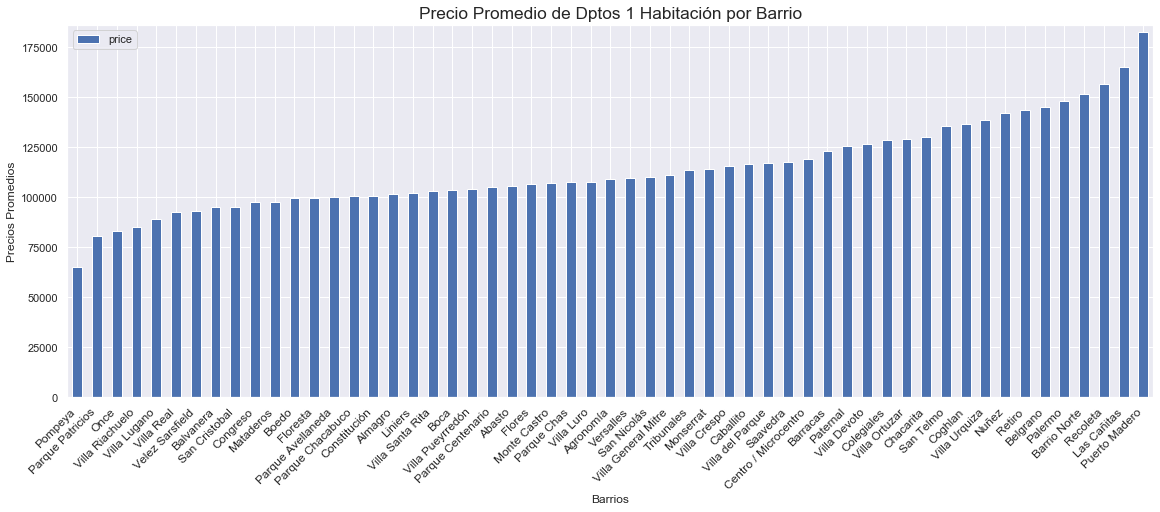

In [76]:
fig, ax = plt.subplots(figsize=(16,7), constrained_layout=True)

desafio.groupby("l3").mean().sort_values("price").plot(kind='bar', ax=ax)
plt.margins(0.02)
plt.ylabel('Precios Promedios')
plt.xlabel('Barrios')
plt.xticks(rotation= 45, fontsize= 12, horizontalalignment= 'right')
ax.set_title("Precio Promedio de Dptos 1 Habitación por Barrio", fontsize= 'x-large')
plt.show()

Al analizar el gráfico se facilita la diferenciación de los precios promedios por barrio. 

Hay una clara diferencia de cual es el barrio mas caro observado, mientras que el barrio con menor precio también refleja una diferencia un tanto significativa frente al resto. Sin embargo, la diferencia entre los precios promedios de los restantes barrios es interesante. Si partimos por los barrios de *menos de 100.000 usd*, solo por la **ubicación**, podemos observar incrementos desde un 50% hasta valores por encima del 100% del precio observado, en los barrios más caros. 

Ahora bien, estos resultados pueden estar **sesgados** por dos motivos:
* Es probable que la muestra no sea de un tamaño que nos permita obterner respuestas contundentes. Al ser tan pocas observaciones, la media de los precios frente a cualquier valor adicional, podría variar en gran forma.
* No todos los barrios cuentan con representación con este tipo de departamentos, lo cual puede traer problemas al momentos de determinar el "barrio más accesible" o el "barrio más caro"

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

### Filtrado de Datos

In [77]:
dataset_ml = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.

In [78]:
dataset_ml = dataset_ml[((dataset_ml['property_type'] == "Departamento") |
                  (dataset_ml['property_type'] == "Casa") |
                  (dataset_ml['property_type'] == "PH")) 
                  & (dataset_ml['l2'] == "Capital Federal")]

2. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.

In [79]:
limite_max = 1000
limite_min = 15

dataset_ml = dataset_ml[(dataset_ml.surface_total <= limite_max) &
                        (dataset_ml.surface_total >= limite_min)]

3. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.

In [80]:
dataset_ml = dataset_ml[(dataset_ml.price <= 4000000)]

4. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.

In [81]:
columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

dataset_ml = dataset_ml[columns]

5. Descarta aquellas instacias con valores faltantes.

In [82]:
dataset_ml = dataset_ml.dropna()

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [83]:
dataset_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81019 entries, 0 to 146558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            81019 non-null  float64
 1   bedrooms         81019 non-null  float64
 2   bathrooms        81019 non-null  float64
 3   surface_total    81019 non-null  float64
 4   surface_covered  81019 non-null  float64
 5   price            81019 non-null  float64
dtypes: float64(6)
memory usage: 4.3 MB


In [84]:
dataset_ml.shape

(81019, 6)

In [85]:
81021 - dataset_ml.shape[0]

2

In [86]:
dataset_ml.columns.tolist()

['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

Elegir una métrica apropiada para evaluar los resultados de los modelos.

La raíz del error cuadrático medio es el criterio de evaluación más usado para problemas de aprendizaje supervisado de regresión. El RMSE (por sus siglas en inglés), mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.

Su calculo es el siguiente:

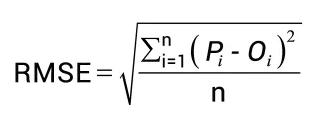


Donde:
* _Pi_ = Valor predicho para la observación i
* _Oi_ = Valor observado para la observación i
* _n_ = la cantidad de observaciones

Si tiene un valor menor, esto significa que los valores pronosticados están cerca de los valores observados. Por lo tanto, vamos a buscar minimizar el RMSE para asegurar que tendremos una mejor estimación de los precios.

### Selección de variables y separación de dataset en train & test

Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`).

In [87]:
# Variables regresoras o independientes
X = dataset_ml.drop(["price"], axis=1)

# Variable dependiente
y = dataset_ml["price"]

Realizar un Train/Test split de los datos.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [89]:
X_train.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered
12452    3.0       2.0        1.0           72.0             72.0
41273    2.0       1.0        1.0           55.0             50.0
62245    3.0       2.0        2.0           79.0             66.0
64848    3.0       2.0        1.0          108.0             80.0
70681    2.0       1.0        1.0           59.0             43.0

### Estimaciones del Modelo Benchmark: Regresión Lineal

Generar un modelo *benchmark* y evaluarlo.

In [90]:
linear_model = LinearRegression()

In [91]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

In [93]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
print("El error cuadrático medio del benchmark para train es:",format(rmse_train, 'f'))
print("El error cuadrático medio del benchmark para test es:",format(rmse_test, 'f'))

El error cuadrático medio del benchmark para train es: 199173.832535
El error cuadrático medio del benchmark para test es: 202449.365404


### Estimación por Modelo de KNN & Árbol de Decisión

Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.

In [94]:
tree_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

In [95]:
tree_regressor.fit(X_train,y_train)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [96]:
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)

In [97]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print("El error cuadrático medio del tree_regressor para train es:",rmse_train)
print("El error cuadrático medio del tree_regressor para test es:",rmse_test)

El error cuadrático medio del tree_regressor para train es: 52460.90877279167
El error cuadrático medio del tree_regressor para test es: 152027.4760376709


In [98]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print("El error cuadrático medio del knn_regressor para train es:",rmse_train)
print("El error cuadrático medio del knn_regressor para test es:",rmse_test)

El error cuadrático medio del knn_regressor para train es: 121300.24049431273
El error cuadrático medio del knn_regressor para test es: 155040.1332898459


### Evaluación de los modelos obtenidos.

Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


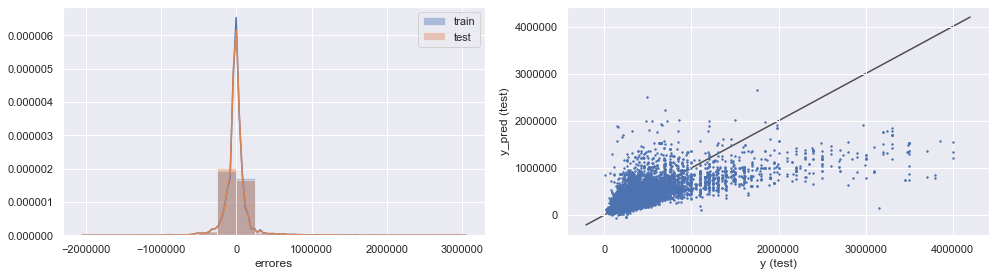

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 52460.90877279167
Raíz del error cuadrático medio en Test: 152027.4760376709


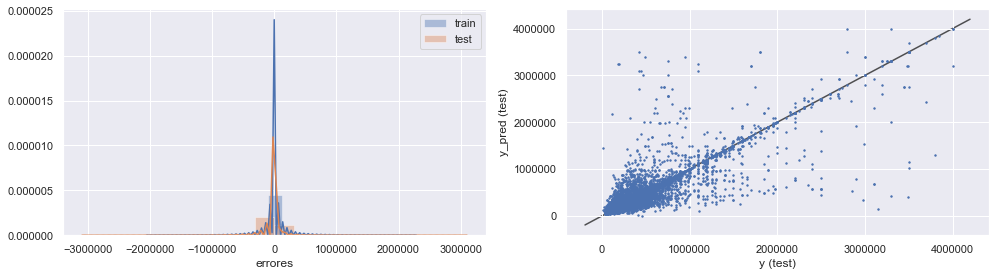

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


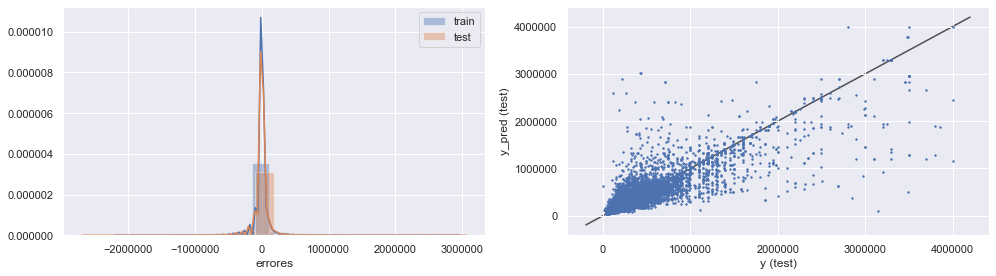

In [99]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Optimización de los Hiper-parámetros

Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

#### KNN

In [100]:
# Definimos las listas vacias para almacenar los valores de RMSE
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    knn.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

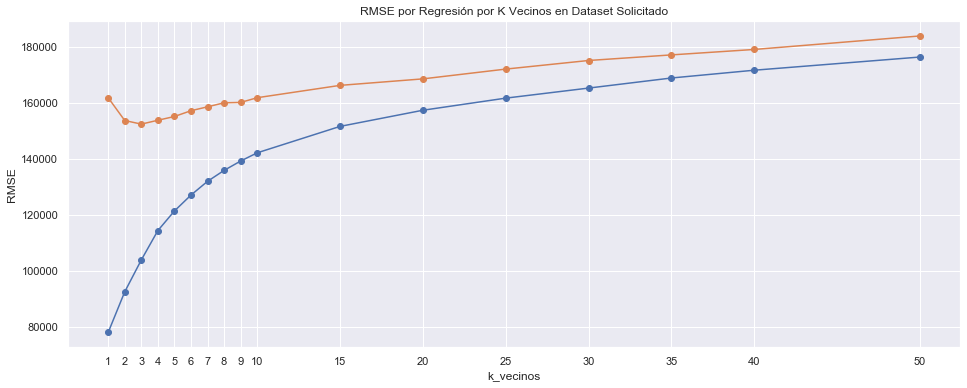

In [101]:
fig = plt.figure(figsize=(16,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.title("RMSE por Regresión por K Vecinos en Dataset Solicitado")
plt.xticks(k_vecinos)
plt.xlabel("k_vecinos")
plt.ylabel("RMSE")

In [102]:
print(f"El valor del n_neighbors seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor de RMSE para train que minimiza el error en test es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo de RMSE para test es",lista_rmse_test[lista_rmse_test.index(min(lista_rmse_test))])

knn_opt = KNeighborsRegressor(n_neighbors= lista_rmse_test.index(min(lista_rmse_test))+1)
knn_opt.fit(X_train, y_train)

El valor del n_neighbors seleccionado es 3
El valor de RMSE para train que minimiza el error en test es 103804.20852724434
El valor mínimo de RMSE para test es 152317.82229037234


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

#### Árbol de Decisiones

In [103]:
# Definimos las listas vacias para almacenar los valores de RMSE
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30]

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad deseada
    tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

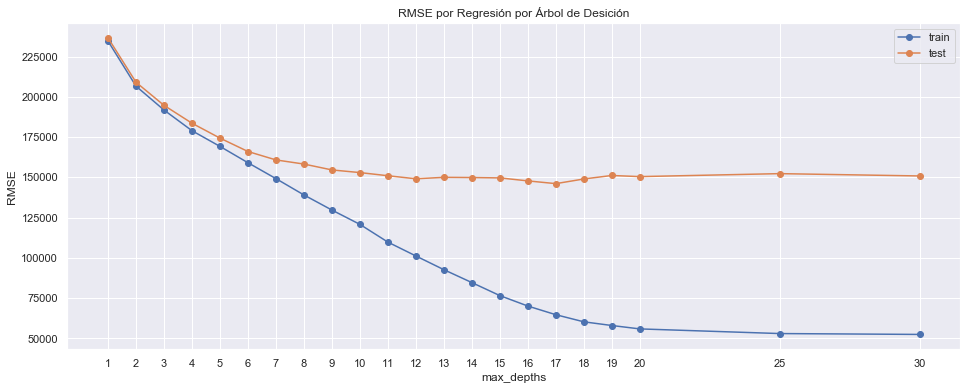

In [104]:
fig = plt.figure(figsize=(16,6))
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.title("RMSE por Regresión por Árbol de Desición")
plt.xticks(max_depths)
plt.xlabel("max_depths")
plt.ylabel("RMSE")

In [105]:
print(f"El valor del max_depth seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor de RMSE para train que minimiza el error en test es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo de RMSE para test es",lista_rmse_test[lista_rmse_test.index(min(lista_rmse_test))])

tree_opt = DecisionTreeRegressor(max_depth= lista_rmse_test.index(min(lista_rmse_test))+1)
tree_opt.fit(X_train, y_train)

El valor del max_depth seleccionado es 17
El valor de RMSE para train que minimiza el error en test es 64721.0697732051
El valor mínimo de RMSE para test es 146092.75848556007


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Evaluación de los modelos optimizados.

Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?

Como se puede observar a continuación, el modelo que mejor ajusta las predicciones sobre nuestra base de test (no debemos caer en comparar los modelos a través de la base de entrenamiento dado que podría estar afectando el problema del sobreajuste del modelo), es el **Árbol de Decisión Optimizado**. El cual tiene como hiperparámetro una **profundidad máxima** de **17**. 

Seleccionamos este modelo ya que **minimiza nuestro indicador RMSE en el test**.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


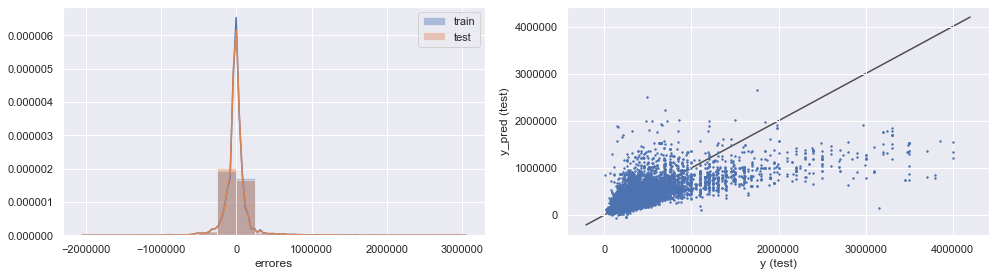

Modelo: Árbol de Decisión Optimizado
Raíz del error cuadrático medio en Train: 64720.91611657254
Raíz del error cuadrático medio en Test: 145789.48280604128


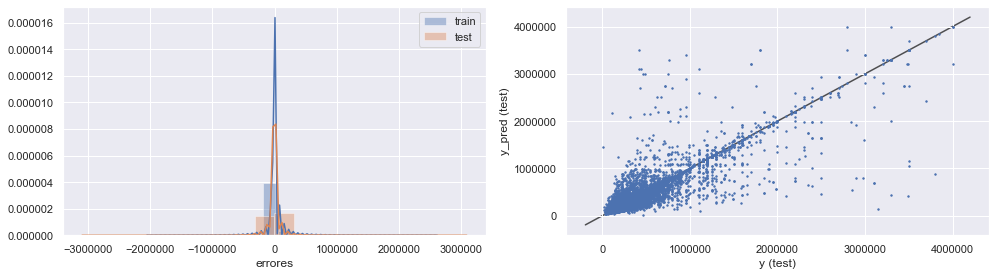

Modelo: Vecinos más cercanos Optimizado
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


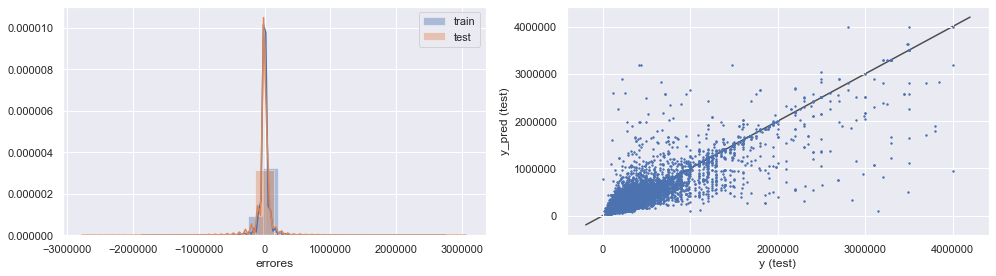

In [106]:
modelos = ['Regresión lineal', 'Árbol de Decisión Optimizado', 'Vecinos más cercanos Optimizado']

for i, model in enumerate([linear_model, tree_opt, knn_opt]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

En los siguientes pasos, corregiré algunas cuestiones que me parecieron mal realizadas o que faltaban en las indicaciones del trabajo. 

Generaré las predicciones con mi dataset personal (el resultante de filtros adicionales resultantes del análisis de los datos). 

Creo que es un **error** no considerar como variables independientes a los *tipos de propiedades*, *datos temporales de la fecha de creación* ni el *barrio* de ubicación de las propiedades. La cual es información adicional muy valiosa que, si bien no estamos seguros si el modelo utilizará para realizar las estimaciones, no debemos rechazarlas si no hay motivos que justifiquen no considerarlas.

# Dataset personal

In [107]:
 dataset_clean_personal.shape

(64201, 20)

In [108]:
dataset_clean_personal_ml = dataset_clean_personal.copy()

limite_max = 1000
limite_min = 15


dataset_clean_personal_ml = dataset_clean_personal_ml[(dataset_clean_personal_ml.surface_total <= limite_max) &
                        (dataset_clean_personal_ml.surface_total >= limite_min)]
dataset_clean_personal_ml.shape

(64201, 20)

In [109]:
dataset_clean_personal_ml = dataset_clean_personal_ml[(dataset_clean_personal_ml.price <= 4000000)]
dataset_clean_personal_ml.shape

(64201, 20)

In [110]:
dataset_clean_personal_ml["created_on"] = pd.to_datetime(dataset_clean_personal_ml["created_on"])
dataset_clean_personal_ml["created_on"].dt.year.value_counts()

2019    60026
2020     4175
Name: created_on, dtype: int64

In [111]:
dataset_clean_personal_ml["created_on"].dt.month.value_counts().sort_index()

1     8351
2     4308
3     5028
4     4495
5     4846
6     4976
7     8043
8     6266
9     3692
10    5341
11    4494
12    4361
Name: created_on, dtype: int64

In [112]:
dataset_clean_personal_ml["currency"].value_counts()

USD    64201
Name: currency, dtype: int64

In [113]:
dataset_clean_personal_ml["operation_type"].value_counts()

Venta    64201
Name: operation_type, dtype: int64

In [114]:
dataset_clean_personal_ml.drop(["start_date","end_date",
                                "lat", "lon",
                                "currency", "operation_type",
                               "price_thousands", "l1", "l2",
                               "title", "description"], axis=1, inplace=True)

Deje de lado las variables:
* "currency": por ser el 100% en USD.
* "operation_type": el total de las instancias eran del tipo venta.
* "price thousands": es una simple transformacion de price.
* "l1" y "l2": ya filtramos por el tipo "Capital Federal".
* "title", "description": no tengo las herramientas para tenerlas en cuenta en la regresión.
* "start_date","end_date": al generar dummies para los meses y los años de "created_on" ya no considero necesario tener en cuenta estas variables.

In [115]:
dataset_clean_personal_ml.head()

created_on      l3  rooms  bedrooms  bathrooms  surface_total  \
11 2019-10-17   Boedo    2.0       1.0        1.0           68.0   
12 2019-10-17   Boedo    2.0       1.0        1.0           50.0   
20 2019-10-17  Abasto    2.0       1.0        1.0           31.0   
22 2019-10-17  Flores    2.0       1.0        1.0           45.0   
23 2019-10-17  Flores    2.0       1.0        1.0           45.0   

    surface_covered     price property_type  
11             59.0  149000.0  Departamento  
12             44.0  115000.0  Departamento  
20             31.0   75000.0  Departamento  
22             45.0   95000.0  Departamento  
23             45.0   95000.0  Departamento

El siguiente bloque genera dummies por cada barrio observado en la variable "l3".

In [116]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml.drop('l3', axis=1),
                                       pd.get_dummies(dataset_clean_personal_ml['l3'])], axis=1)

In [117]:
dataset_clean_personal_ml.head()

created_on  rooms  bedrooms  bathrooms  surface_total  surface_covered  \
11 2019-10-17    2.0       1.0        1.0           68.0             59.0   
12 2019-10-17    2.0       1.0        1.0           50.0             44.0   
20 2019-10-17    2.0       1.0        1.0           31.0             31.0   
22 2019-10-17    2.0       1.0        1.0           45.0             45.0   
23 2019-10-17    2.0       1.0        1.0           45.0             45.0   

       price property_type  Abasto  Agronomía  ...  Villa Lugano  Villa Luro  \
11  149000.0  Departamento       0          0  ...             0           0   
12  115000.0  Departamento       0          0  ...             0           0   
20   75000.0  Departamento       1          0  ...             0           0   
22   95000.0  Departamento       0          0  ...             0           0   
23   95000.0  Departamento       0          0  ...             0           0   

    Villa Ortuzar  Villa Pueyrredón  Villa Real  Villa Riachuelo  \
11              0                 0           0                0   
12              0                 0           0                0   
20              0                 0           0                0   
22              0                 0           0                0   
23              0                 0           0                0   

    Villa Santa Rita  Villa Soldati  Villa Urquiza  Villa del Parque  
11                 0              0              0                 0  
12                 0              0              0                 0  
20                 0              0              0                 0  
22                 0              0              0                 0  
23                 0              0              0                 0  

[5 rows x 65 columns]

In [118]:
dataset_clean_personal_ml.columns

Index(['created_on', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type', 'Abasto', 'Agronomía',
       'Almagro', 'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca',
       'Boedo', 'Caballito', 'Catalinas', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat',
       'Monte Castro', 'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero', 'Recoleta',
       'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo',
       'Tribunales', 'Velez Sarsfield', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
       'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo',
       'Villa Santa Rita', 'Villa Soldati', 

El siguiente bloque genera dummies por cada tipo de propiedad observado.

In [119]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml.drop('property_type', axis=1),
                                       pd.get_dummies(dataset_clean_personal_ml['property_type'])], axis=1)

In [120]:
dataset_clean_personal_ml.head()

created_on  rooms  bedrooms  bathrooms  surface_total  surface_covered  \
11 2019-10-17    2.0       1.0        1.0           68.0             59.0   
12 2019-10-17    2.0       1.0        1.0           50.0             44.0   
20 2019-10-17    2.0       1.0        1.0           31.0             31.0   
22 2019-10-17    2.0       1.0        1.0           45.0             45.0   
23 2019-10-17    2.0       1.0        1.0           45.0             45.0   

       price  Abasto  Agronomía  Almagro  ...  Villa Pueyrredón  Villa Real  \
11  149000.0       0          0        0  ...                 0           0   
12  115000.0       0          0        0  ...                 0           0   
20   75000.0       1          0        0  ...                 0           0   
22   95000.0       0          0        0  ...                 0           0   
23   95000.0       0          0        0  ...                 0           0   

    Villa Riachuelo  Villa Santa Rita  Villa Soldati  Villa Urquiza  \
11                0                 0              0              0   
12                0                 0              0              0   
20                0                 0              0              0   
22                0                 0              0              0   
23                0                 0              0              0   

    Villa del Parque  Casa  Departamento  PH  
11                 0     0             1   0  
12                 0     0             1   0  
20                 0     0             1   0  
22                 0     0             1   0  
23                 0     0             1   0  

[5 rows x 67 columns]

In [121]:
dataset_clean_personal_ml.columns

Index(['created_on', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'Abasto', 'Agronomía', 'Almagro',
       'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo',
       'Caballito', 'Catalinas', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat',
       'Monte Castro', 'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero', 'Recoleta',
       'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo',
       'Tribunales', 'Velez Sarsfield', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
       'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Urquiza',


El siguiente bloque genera dummies por cada año y mes observado en la variable "created_on".

In [122]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml,
                                       pd.get_dummies(dataset_clean_personal_ml['created_on'].dt.year)], axis=1)

In [123]:
dataset_clean_personal_ml.head()

created_on  rooms  bedrooms  bathrooms  surface_total  surface_covered  \
11 2019-10-17    2.0       1.0        1.0           68.0             59.0   
12 2019-10-17    2.0       1.0        1.0           50.0             44.0   
20 2019-10-17    2.0       1.0        1.0           31.0             31.0   
22 2019-10-17    2.0       1.0        1.0           45.0             45.0   
23 2019-10-17    2.0       1.0        1.0           45.0             45.0   

       price  Abasto  Agronomía  Almagro  ...  Villa Riachuelo  \
11  149000.0       0          0        0  ...                0   
12  115000.0       0          0        0  ...                0   
20   75000.0       1          0        0  ...                0   
22   95000.0       0          0        0  ...                0   
23   95000.0       0          0        0  ...                0   

    Villa Santa Rita  Villa Soldati  Villa Urquiza  Villa del Parque  Casa  \
11                 0              0              0                 0     0   
12                 0              0              0                 0     0   
20                 0              0              0                 0     0   
22                 0              0              0                 0     0   
23                 0              0              0                 0     0   

    Departamento  PH  2019  2020  
11             1   0     1     0  
12             1   0     1     0  
20             1   0     1     0  
22             1   0     1     0  
23             1   0     1     0  

[5 rows x 69 columns]

In [124]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml.drop('created_on', axis=1),
                                       pd.get_dummies(dataset_clean_personal_ml['created_on'].dt.month)], axis=1)

In [125]:
dataset_clean_personal_ml.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
11    2.0       1.0        1.0           68.0             59.0  149000.0   
12    2.0       1.0        1.0           50.0             44.0  115000.0   
20    2.0       1.0        1.0           31.0             31.0   75000.0   
22    2.0       1.0        1.0           45.0             45.0   95000.0   
23    2.0       1.0        1.0           45.0             45.0   95000.0   

    Abasto  Agronomía  Almagro  Balvanera  ...  3  4  5  6  7  8  9  10  11  \
11       0          0        0          0  ...  0  0  0  0  0  0  0   1   0   
12       0          0        0          0  ...  0  0  0  0  0  0  0   1   0   
20       1          0        0          0  ...  0  0  0  0  0  0  0   1   0   
22       0          0        0          0  ...  0  0  0  0  0  0  0   1   0   
23       0          0        0          0  ...  0  0  0  0  0  0  0   1   0   

    12  
11   0  
12   0  
20   0  
22   0  
23   0  

[5 rows x 80 columns]

In [126]:
dataset_clean_personal_ml.columns

Index([               'rooms',             'bedrooms',            'bathrooms',
              'surface_total',      'surface_covered',                'price',
                     'Abasto',            'Agronomía',              'Almagro',
                  'Balvanera',             'Barracas',         'Barrio Norte',
                   'Belgrano',                 'Boca',                'Boedo',
                  'Caballito',            'Catalinas', 'Centro / Microcentro',
                  'Chacarita',              'Coghlan',           'Colegiales',
                   'Congreso',         'Constitución',               'Flores',
                   'Floresta',          'Las Cañitas',              'Liniers',
                  'Mataderos',            'Monserrat',         'Monte Castro',
                      'Nuñez',                 'Once',              'Palermo',
          'Parque Avellaneda',    'Parque Centenario',     'Parque Chacabuco',
                'Parque Chas',     'Parque Patricios

In [127]:
dataset_clean_personal_ml.shape

(64201, 80)

### Selección de variables y separación de dataset en train & test

Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`).

In [128]:
# Variables regresoras o independientes
X2 = dataset_clean_personal_ml.drop(["price"], axis=1)

# Variable dependiente
y2 = dataset_clean_personal_ml["price"]

In [129]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(44940, 79) (44940,) (19261, 79) (19261,)


### Estimaciones del Modelo Benchmark: Regresión Lineal

Generar un modelo benchmark y evaluarlo.

In [130]:
linear_model2 = LinearRegression()

In [131]:
linear_model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
y2_train_pred_linear = linear_model2.predict(X2_train)
y2_test_pred_linear = linear_model2.predict(X2_test)

In [133]:
rmse_train2 = np.sqrt(mean_squared_error(y2_train, y2_train_pred_linear))
rmse_test2 = np.sqrt(mean_squared_error(y2_test, y2_test_pred_linear))
print("El error cuadrático medio del benchmark para train2 es:",rmse_train2)
print("El error cuadrático medio del benchmark para test2 es:",rmse_test2)

El error cuadrático medio del benchmark para train2 es: 44810.389343417286
El error cuadrático medio del benchmark para test2 es: 45320.47656186776


### Estimación por Modelo de KNN & Árbol de Decisión

Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.

In [134]:
tree_regressor2 = DecisionTreeRegressor(random_state=42)
knn_regressor2 = KNeighborsRegressor()

In [135]:
tree_regressor2.fit(X2_train,y2_train)
knn_regressor2.fit(X2_train,y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [136]:
y2_train_pred_tree = tree_regressor2.predict(X2_train)
y2_test_pred_tree = tree_regressor2.predict(X2_test)

y2_train_pred_knn = knn_regressor2.predict(X2_train)
y2_test_pred_knn = knn_regressor2.predict(X2_test)

In [137]:
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred_tree))
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred_tree))
print("El error cuadrático medio del tree_regressor2 para train es:",rmse_train)
print("El error cuadrático medio del tree_regressor2 para test es:",rmse_test)

El error cuadrático medio del tree_regressor2 para train es: 6799.2906293796495
El error cuadrático medio del tree_regressor2 para test es: 42107.85976156918


In [138]:
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred_knn))
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred_knn))
print("El error cuadrático medio del knn_regressor para train es:",rmse_train)
print("El error cuadrático medio del knn_regressor para test es:",rmse_test)

El error cuadrático medio del knn_regressor para train es: 35412.86884794389
El error cuadrático medio del knn_regressor para test es: 44797.035163627705


### Evaluación de los modelos obtenidos.

Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

Modelo: Regresión lineal2
Raíz del error cuadrático medio en Train: 44810.389343417286
Raíz del error cuadrático medio en Test: 45320.47656186776


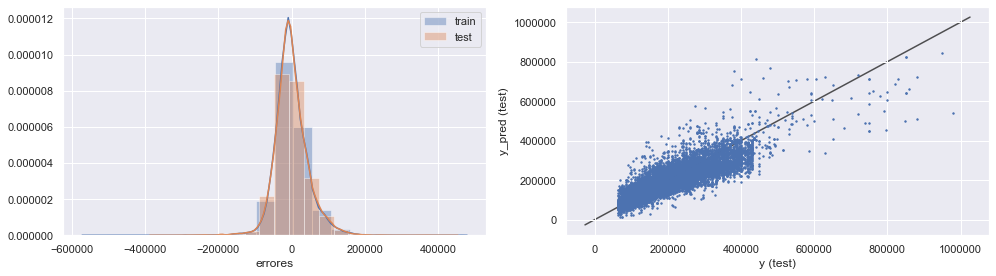

Modelo: Árbol de Decisión2
Raíz del error cuadrático medio en Train: 6799.2906293796495
Raíz del error cuadrático medio en Test: 42107.85976156918


C:\Users\usuario\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


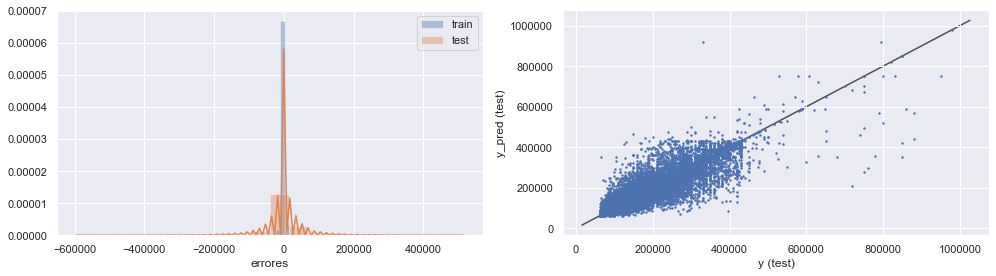

Modelo: Vecinos más cercanos2
Raíz del error cuadrático medio en Train: 35412.86884794389
Raíz del error cuadrático medio en Test: 44797.035163627705


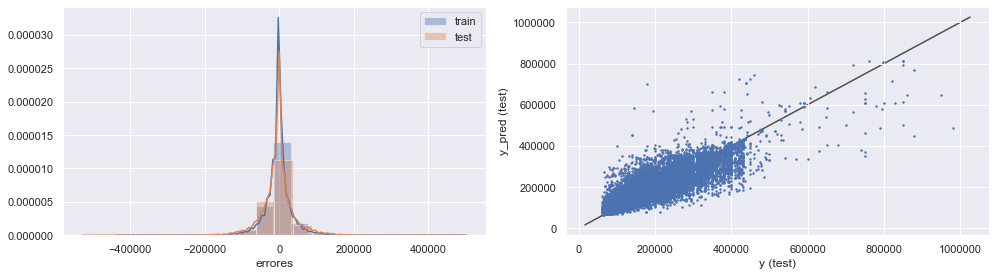

In [139]:
modelos = ['Regresión lineal2', 'Árbol de Decisión2', 'Vecinos más cercanos2']

for i, model in enumerate([linear_model2, tree_regressor2, knn_regressor2]):
    y2_train_pred = model.predict(X2_train)
    y2_test_pred = model.predict(X2_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y2_train - y2_train_pred, bins = 20, label = 'train')
    sns.distplot(y2_test - y2_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y2_test,y2_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Optimización de los Hiper-parámetros

Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

#### KNN2

In [140]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    knn.fit(X2_train,y2_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y2_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y2_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

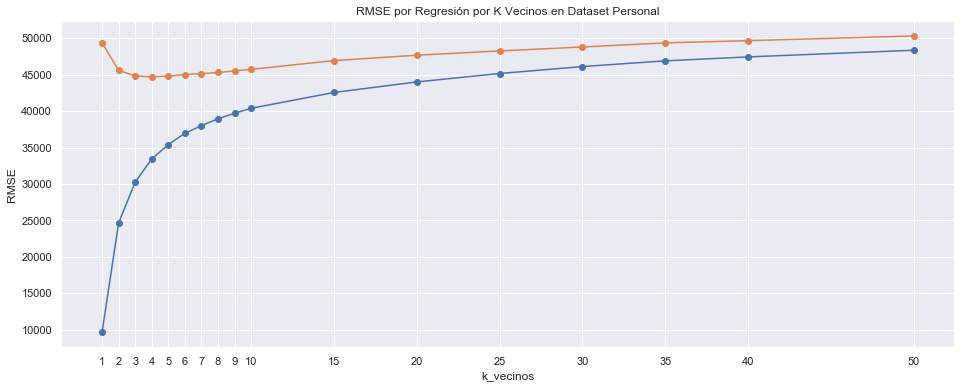

In [141]:
fig = plt.figure(figsize=(16,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.title("RMSE por Regresión por K Vecinos en Dataset Personal")
plt.xticks(k_vecinos)
plt.xlabel("k_vecinos")
plt.ylabel("RMSE")

In [142]:
print(f"El valor del n_neighbors seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor de la tabla train que minimiza el error en test es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo para test es",lista_rmse_test[lista_rmse_test.index(min(lista_rmse_test))])

knn_opt = KNeighborsRegressor(n_neighbors= lista_rmse_test.index(min(lista_rmse_test))+1)
knn_opt.fit(X2_train, y2_train)

El valor del n_neighbors seleccionado es 4
El valor de la tabla train que minimiza el error en test es 33438.18563208254
El valor mínimo para test es 44712.54998196943


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

### Árbol de Decisiones2

In [143]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = list(range(1,51))

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad deseada
    tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X2_train,y2_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y2_train_pred = tree.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y2_test_pred = tree.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

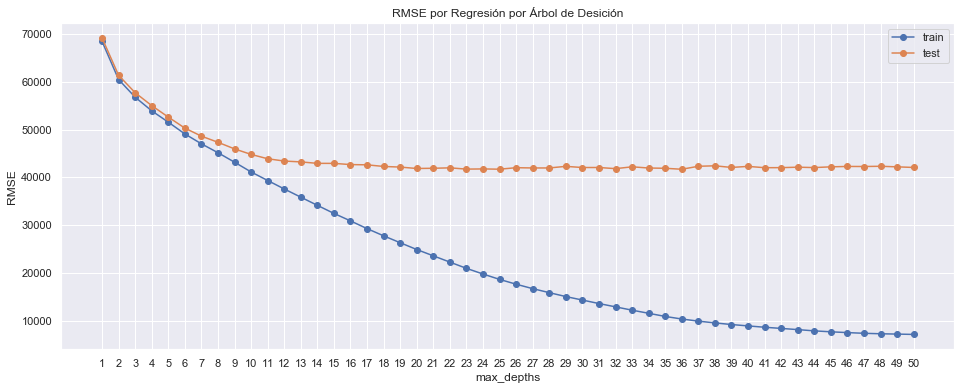

In [144]:
fig = plt.figure(figsize=(16,6))
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.title("RMSE por Regresión por Árbol de Desición")
plt.xticks(max_depths)
plt.xlabel("max_depths")
plt.ylabel("RMSE")

In [145]:
print(f"El valor del max_depth seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor del RMSE de train es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo para test es",min(lista_rmse_test))

tree_opt = DecisionTreeRegressor(max_depth= lista_rmse_test.index(min(lista_rmse_test))+1, random_state=42)
tree_opt.fit(X2_train, y2_train)

El valor del max_depth seleccionado es 36
El valor del RMSE de train es 10320.29193591253
El valor mínimo para test es 41675.33186294686


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=36,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

# Evaluación de los modelos optimizados.

Modelo: Regresión lineal 2
Raíz del error cuadrático medio en Train: 44810.389343417286
Raíz del error cuadrático medio en Test: 45320.47656186776


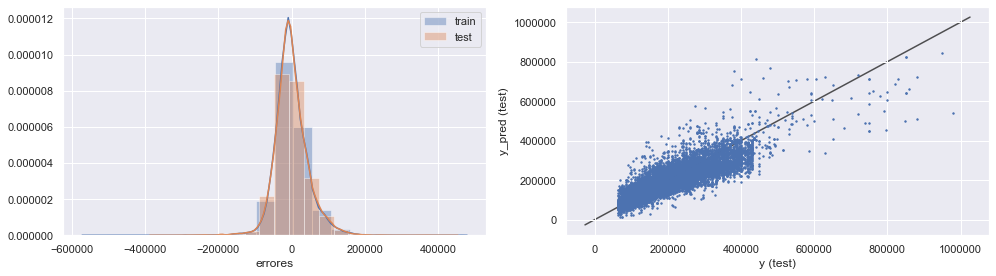

Modelo: Árbol de Decisión 2 Optimizado
Raíz del error cuadrático medio en Train: 10320.29193591253
Raíz del error cuadrático medio en Test: 41675.33186294686


C:\Users\usuario\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


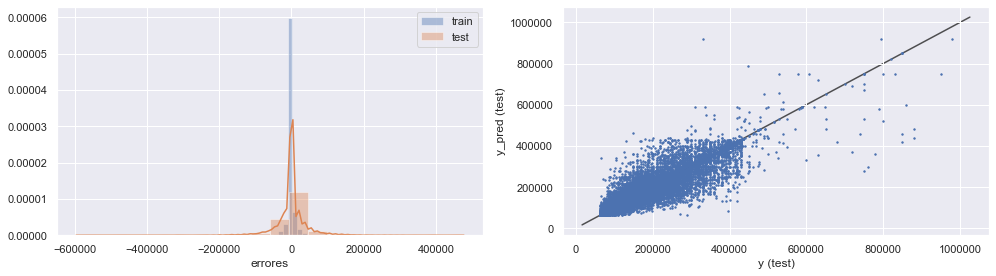

Modelo: Vecinos más cercanos 2 Optimizado
Raíz del error cuadrático medio en Train: 33438.18563208254
Raíz del error cuadrático medio en Test: 44712.54998196943


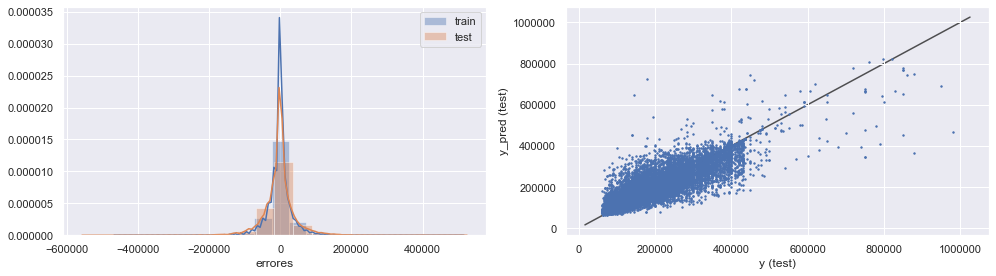

In [146]:
modelos = ['Regresión lineal 2', 'Árbol de Decisión 2 Optimizado', 'Vecinos más cercanos 2 Optimizado']

for i, model in enumerate([linear_model2, tree_opt, knn_opt]):
    y2_train_pred = model.predict(X2_train)
    y2_test_pred = model.predict(X2_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y2_train - y2_train_pred, bins = 20, label = 'train')
    sns.distplot(y2_test - y2_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y2_test,y2_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Resultados:

* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?

Para esta nueva estimación, el modelo seleccionado es el **Árbol de Decisión 2 Optimizado**, el cual *minimiza el RMSE* para la tabla de test.

Los resultados son ampliamente superiores al  Árbol de Decisión Optimizado como se puede notar a continuación:

Modelo: **Árbol de Decisión Optimizado**

    * Raíz del error cuadrático medio en Train: 64720 (Aproximadamente)
    * Raíz del error cuadrático medio en Test: 145275 (Aproximadamente)

Modelo: **Árbol de Decisión 2 Optimizado**

    * Raíz del error cuadrático medio en Train: 10320 (Aproximadamente)
    * Raíz del error cuadrático medio en Test: 41675 (Aproximadamente)

Si bien esta disminución del error es muy positiva, no estoy conforme con el nivel de error que todavía observo.

# Propuesta Alternativa

Una metodología alternativa que consideraré en los siguientes pasos, es estimar un modelo particular por cada tipo de propiedad y luego, considerar la raiz del error cuadrático medio sumando los promedios ponderados de cada modelo.

## Modelos particulares por cada tipo de propiedad

Cantidad de observaciónes de cada tipo de propiedad:

In [147]:
print(len(dataset_clean_personal_ml[dataset_clean_personal_ml["Departamento"]==1]))
print(len(dataset_clean_personal_ml[dataset_clean_personal_ml["Casa"]==1]))
print(len(dataset_clean_personal_ml[dataset_clean_personal_ml["PH"]==1]))

54655
1502
8044


## Modelo para Departamentos

In [148]:
# Variables regresoras o independientes
departamentos = dataset_clean_personal_ml[dataset_clean_personal_ml["Departamento"]==1]
X2_dpto = departamentos.drop(["price"], axis=1)

# Variable dependiente
y2_dpto = departamentos["price"]

In [149]:
X2_dpto_train, X2_dpto_test, y2_dpto_train, y2_dpto_test = train_test_split(X2_dpto, y2_dpto, test_size=0.3, random_state=42)

print(X2_dpto_train.shape, y2_dpto_train.shape, X2_dpto_test.shape, y2_dpto_test.shape)

(38258, 79) (38258,) (16397, 79) (16397,)


In [150]:
linear_model2 = LinearRegression()
linear_model2.fit(X2_dpto_train, y2_dpto_train)
y2_dpto_train_pred_linear = linear_model2.predict(X2_dpto_train)
y2_dpto_test_pred_linear = linear_model2.predict(X2_dpto_test)
rmse_dpto_train2 = np.sqrt(mean_squared_error(y2_dpto_train, y2_dpto_train_pred_linear))
rmse_dpto_test2 = np.sqrt(mean_squared_error(y2_dpto_test, y2_dpto_test_pred_linear))
print("El error cuadrático medio del benchmark_dpto para train2 es:",rmse_dpto_train2)
print("El error cuadrático medio del benchmark_dpto para test2 es:",rmse_dpto_test2)

El error cuadrático medio del benchmark_dpto para train2 es: 39443.24941088082
El error cuadrático medio del benchmark_dpto para test2 es: 39341.82249988844


In [151]:
tree_dpto_regressor2 = DecisionTreeRegressor(random_state=42)
knn_dpto_regressor2 = KNeighborsRegressor()
tree_dpto_regressor2.fit(X2_dpto_train,y2_dpto_train)
knn_dpto_regressor2.fit(X2_dpto_train,y2_dpto_train)
y2_dpto_train_pred_tree = tree_regressor2.predict(X2_dpto_train)
y2_dpto_test_pred_tree = tree_regressor2.predict(X2_dpto_test)

y2_dpto_train_pred_knn = knn_dpto_regressor2.predict(X2_dpto_train)
y2_dpto_test_pred_knn = knn_dpto_regressor2.predict(X2_dpto_test)
rmse_dpto_train = np.sqrt(mean_squared_error(y2_dpto_train, y2_dpto_train_pred_tree))
rmse_dpto_test = np.sqrt(mean_squared_error(y2_dpto_test, y2_dpto_test_pred_tree))
print("El error cuadrático medio del tree_dpto_regressor2 para train es:",rmse_dpto_train)
print("El error cuadrático medio del tree_dpto_regressor2 para test es:",rmse_dpto_test)
rmse_dpto_train = np.sqrt(mean_squared_error(y2_dpto_train, y2_dpto_train_pred_knn))
rmse_dpto_test = np.sqrt(mean_squared_error(y2_dpto_test, y2_dpto_test_pred_knn))
print("El error cuadrático medio del knn_dpto_regressor para train es:",rmse_dpto_train)
print("El error cuadrático medio del knn_dpto_regressor para test es:",rmse_dpto_test)

El error cuadrático medio del tree_dpto_regressor2 para train es: 17282.14076365235
El error cuadrático medio del tree_dpto_regressor2 para test es: 29078.589663464358
El error cuadrático medio del knn_dpto_regressor para train es: 31085.76075131174
El error cuadrático medio del knn_dpto_regressor para test es: 38576.05685245265


In [152]:
lista_rmse_train_dpto = []
lista_rmse_test_dpto = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    knn.fit(X2_dpto_train,y2_dpto_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn.predict(X2_dpto_train)
    rmse_train = np.sqrt(mean_squared_error(y2_dpto_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn.predict(X2_dpto_test)
    rmse_test = np.sqrt(mean_squared_error(y2_dpto_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train_dpto.append(rmse_train)
    lista_rmse_test_dpto.append(rmse_test)

Text(0, 0.5, 'RMSE')

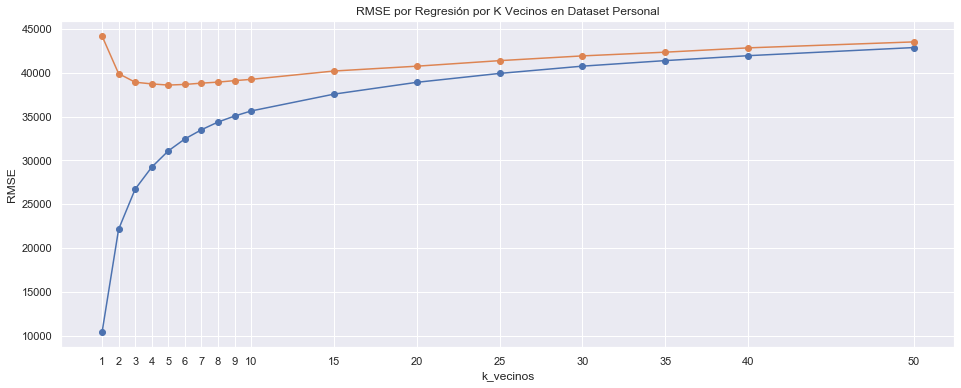

In [153]:
fig = plt.figure(figsize=(16,6))
plt.plot(k_vecinos,lista_rmse_train_dpto,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test_dpto,'o-',label='test')
plt.title("RMSE por Regresión por K Vecinos en Dataset Personal")
plt.xticks(k_vecinos)
plt.xlabel("k_vecinos")
plt.ylabel("RMSE")

In [154]:
print(f"El valor del n_neighbors seleccionado es {lista_rmse_test_dpto.index(min(lista_rmse_test_dpto))+1}")
print("El valor de la tabla train que minimiza el error en test es",lista_rmse_train_dpto[lista_rmse_test_dpto.index(min(lista_rmse_test_dpto))])
print("El valor mínimo para test es",lista_rmse_test_dpto[lista_rmse_test_dpto.index(min(lista_rmse_test_dpto))])

knn_opt = KNeighborsRegressor(n_neighbors= lista_rmse_test_dpto.index(min(lista_rmse_test_dpto))+1)
knn_opt.fit(X2_dpto_train, y2_dpto_train)

El valor del n_neighbors seleccionado es 5
El valor de la tabla train que minimiza el error en test es 31085.76075131174
El valor mínimo para test es 38576.05685245265


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [155]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train_dpto = []
lista_rmse_test_dpto = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = list(range(1,51))

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad deseada
    tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X2_dpto_train,y2_dpto_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y2_train_pred = tree.predict(X2_dpto_train)
    rmse_train = np.sqrt(mean_squared_error(y2_dpto_train, y2_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y2_test_pred = tree.predict(X2_dpto_test)
    rmse_test = np.sqrt(mean_squared_error(y2_dpto_test, y2_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train_dpto.append(rmse_train)
    lista_rmse_test_dpto.append(rmse_test)

Text(0, 0.5, 'RMSE')

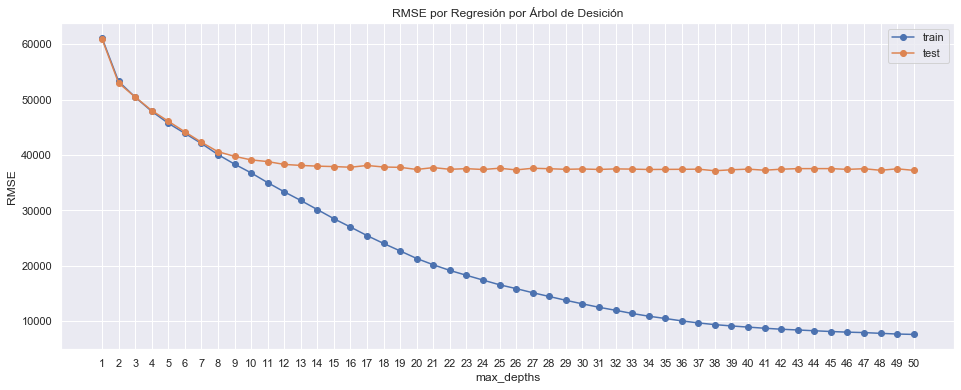

In [156]:
fig = plt.figure(figsize=(16,6))
plt.plot(max_depths,lista_rmse_train_dpto,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test_dpto,'o-',label='test')
plt.legend()
plt.title("RMSE por Regresión por Árbol de Desición")
plt.xticks(max_depths)
plt.xlabel("max_depths")
plt.ylabel("RMSE")

In [157]:
print(f"El valor del max_depth seleccionado es {lista_rmse_test_dpto.index(min(lista_rmse_test_dpto))+1}")
print("El valor del RMSE de train es",lista_rmse_train_dpto[lista_rmse_test_dpto.index(min(lista_rmse_test_dpto))])
print("El valor mínimo para test es",min(lista_rmse_test_dpto))

tree_opt = DecisionTreeRegressor(max_depth= lista_rmse_test_dpto.index(min(lista_rmse_test_dpto))+1, random_state=42)
tree_opt.fit(X2_dpto_train, y2_dpto_train)

El valor del max_depth seleccionado es 38
El valor del RMSE de train es 9411.239303385582
El valor mínimo para test es 37164.81783008725


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=38,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Modelo: Regresión lineal 2
Raíz del error cuadrático medio en Train: 39443.24941088082
Raíz del error cuadrático medio en Test: 39341.82249988844


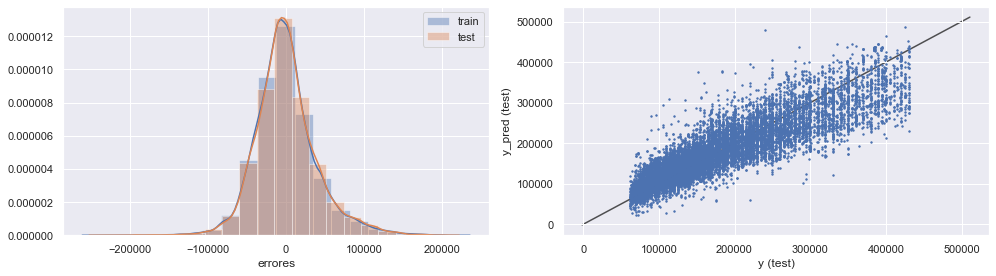

Modelo: Árbol de Decisión 2 Optimizado
Raíz del error cuadrático medio en Train: 9411.239303385582
Raíz del error cuadrático medio en Test: 37164.81783008725


C:\Users\usuario\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


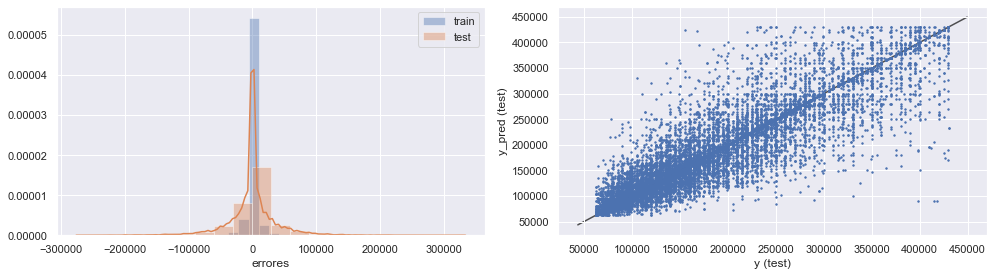

Modelo: Vecinos más cercanos 2 Optimizado
Raíz del error cuadrático medio en Train: 31085.76075131174
Raíz del error cuadrático medio en Test: 38576.05685245265


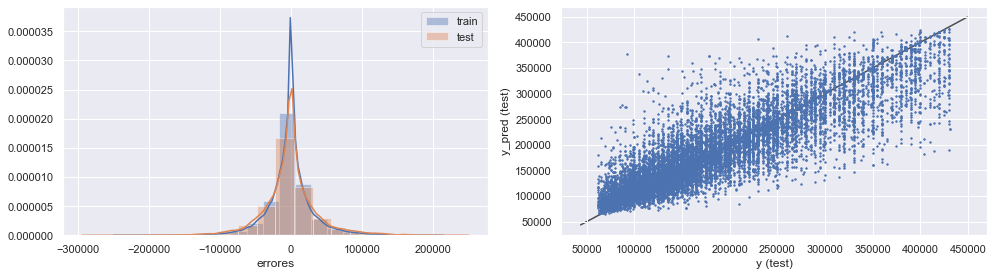

In [158]:
modelos = ['Regresión lineal 2', 'Árbol de Decisión 2 Optimizado', 'Vecinos más cercanos 2 Optimizado']

for i, model in enumerate([linear_model2, tree_opt, knn_opt]):
    y2_train_pred = model.predict(X2_dpto_train)
    y2_test_pred = model.predict(X2_dpto_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y2_dpto_train, y2_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y2_dpto_test, y2_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y2_dpto_train - y2_train_pred, bins = 20, label = 'train')
    sns.distplot(y2_dpto_test - y2_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y2_dpto_test,y2_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Resultados para Departamentos:

El seleccionado es: **Árbol de Decisión 2 Optimizado**

Raíz del error cuadrático medio en Train: 9411.239303385582

Raíz del error cuadrático medio en Test: 37164.81783008725

## Modelo para Casas

In [159]:
# Variables regresoras o independientes
casas=dataset_clean_personal_ml[dataset_clean_personal_ml["Casa"]==1]
X2 = casas.drop(["price"], axis=1)

# Variable dependiente
y2 = casas["price"]

In [160]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(1051, 79) (1051,) (451, 79) (451,)


In [161]:
linear_model2 = LinearRegression()
linear_model2.fit(X2_train, y2_train)
y2_train_pred_linear = linear_model2.predict(X2_train)
y2_test_pred_linear = linear_model2.predict(X2_test)
rmse_train2 = np.sqrt(mean_squared_error(y2_train, y2_train_pred_linear))
rmse_test2 = np.sqrt(mean_squared_error(y2_test, y2_test_pred_linear))
print("El error cuadrático medio del benchmark para train2 es:",rmse_train2)
print("El error cuadrático medio del benchmark para test2 es:",rmse_test2)

El error cuadrático medio del benchmark para train2 es: 89473.23395429348
El error cuadrático medio del benchmark para test2 es: 93820.5651665717


In [162]:
tree_regressor2 = DecisionTreeRegressor(random_state=42)
knn_regressor2 = KNeighborsRegressor()
tree_regressor2.fit(X2_train,y2_train)
knn_regressor2.fit(X2_train,y2_train)
y2_train_pred_tree = tree_regressor2.predict(X2_train)
y2_test_pred_tree = tree_regressor2.predict(X2_test)

y2_train_pred_knn = knn_regressor2.predict(X2_train)
y2_test_pred_knn = knn_regressor2.predict(X2_test)
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred_tree))
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred_tree))
print("El error cuadrático medio del tree_regressor2 para train es:",rmse_train)
print("El error cuadrático medio del tree_regressor2 para test es:",rmse_test)
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred_knn))
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred_knn))
print("El error cuadrático medio del knn_regressor para train es:",rmse_train)
print("El error cuadrático medio del knn_regressor para test es:",rmse_test)

El error cuadrático medio del tree_regressor2 para train es: 218.1140511198411
El error cuadrático medio del tree_regressor2 para test es: 112031.98082860703
El error cuadrático medio del knn_regressor para train es: 99768.2549359365
El error cuadrático medio del knn_regressor para test es: 122590.29510226348


In [163]:
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    knn.fit(X2_train,y2_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y2_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y2_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

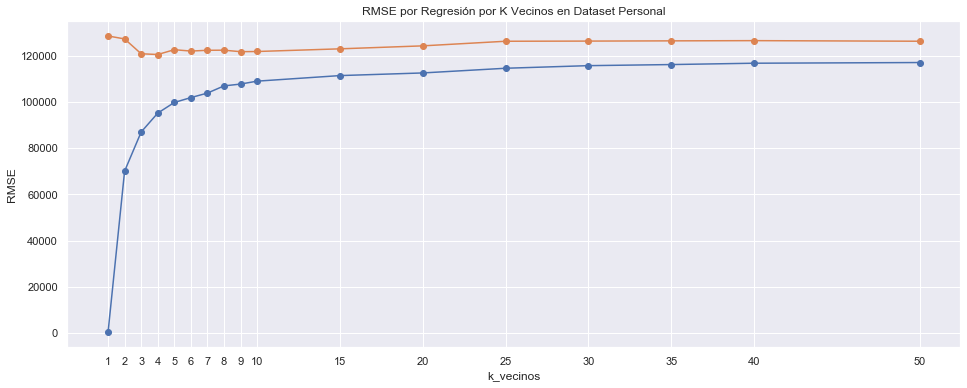

In [164]:
fig = plt.figure(figsize=(16,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.title("RMSE por Regresión por K Vecinos en Dataset Personal")
plt.xticks(k_vecinos)
plt.xlabel("k_vecinos")
plt.ylabel("RMSE")

In [165]:
print(f"El valor del n_neighbors seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor de la tabla train que minimiza el error en test es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo para test es",lista_rmse_test[lista_rmse_test.index(min(lista_rmse_test))])

knn_opt = KNeighborsRegressor(n_neighbors= lista_rmse_test.index(min(lista_rmse_test))+1)
knn_opt.fit(X2_train, y2_train)

El valor del n_neighbors seleccionado es 4
El valor de la tabla train que minimiza el error en test es 95162.32269537302
El valor mínimo para test es 120510.77356562637


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [166]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = list(range(1,51))

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad deseada
    tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X2_train,y2_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y2_train_pred = tree.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y2_test_pred = tree.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

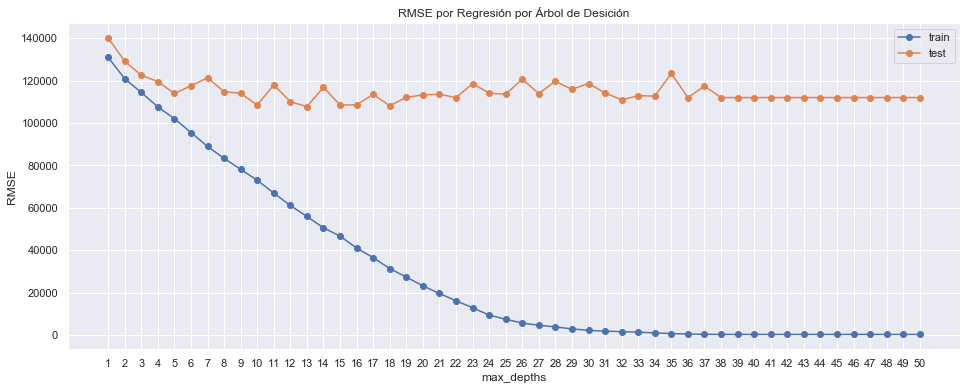

In [167]:
fig = plt.figure(figsize=(16,6))
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.title("RMSE por Regresión por Árbol de Desición")
plt.xticks(max_depths)
plt.xlabel("max_depths")
plt.ylabel("RMSE")

In [168]:
print(f"El valor del max_depth seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor del RMSE de train es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo para test es",min(lista_rmse_test))

tree_opt = DecisionTreeRegressor(max_depth= lista_rmse_test.index(min(lista_rmse_test))+1, random_state=42)
tree_opt.fit(X2_train, y2_train)

El valor del max_depth seleccionado es 13
El valor del RMSE de train es 55888.33431485017
El valor mínimo para test es 107740.89251941997


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Modelo: Regresión lineal 2
Raíz del error cuadrático medio en Train: 89473.23395429348
Raíz del error cuadrático medio en Test: 93820.5651665717


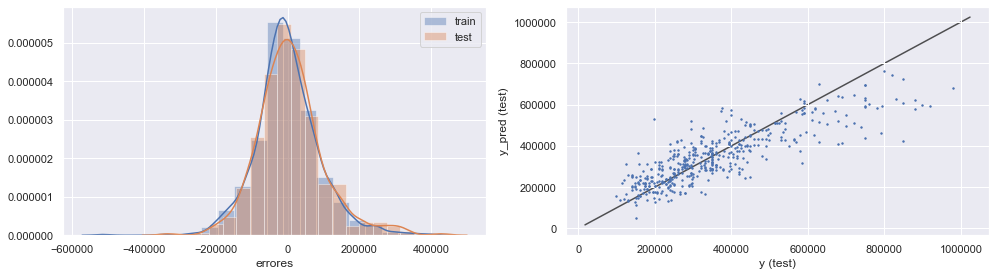

Modelo: Árbol de Decisión 2 Optimizado
Raíz del error cuadrático medio en Train: 55888.33431485017
Raíz del error cuadrático medio en Test: 107740.89251941997


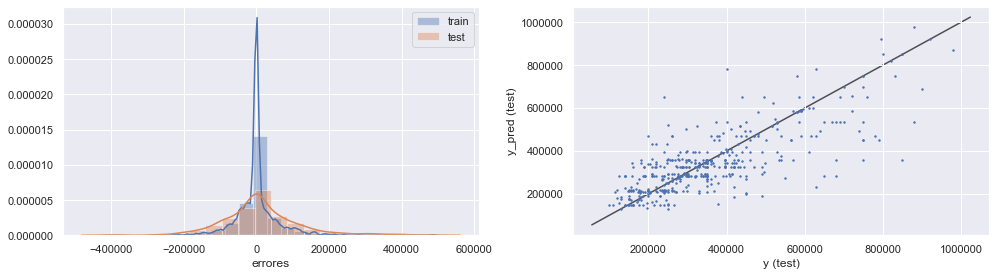

Modelo: Vecinos más cercanos 2 Optimizado
Raíz del error cuadrático medio en Train: 95162.32269537302
Raíz del error cuadrático medio en Test: 120510.77356562637


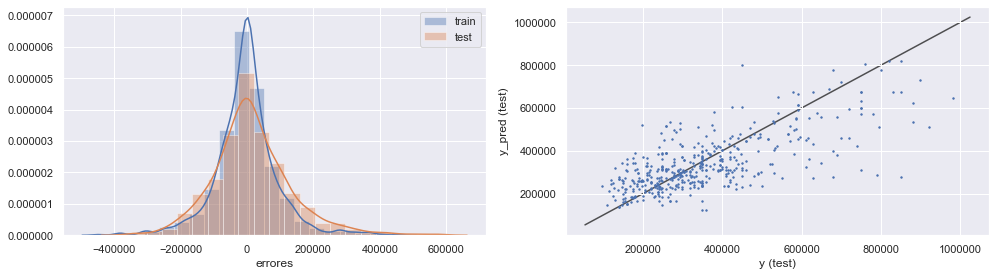

In [169]:
modelos = ['Regresión lineal 2', 'Árbol de Decisión 2 Optimizado', 'Vecinos más cercanos 2 Optimizado']

for i, model in enumerate([linear_model2, tree_opt, knn_opt]):
    y2_train_pred = model.predict(X2_train)
    y2_test_pred = model.predict(X2_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y2_train - y2_train_pred, bins = 20, label = 'train')
    sns.distplot(y2_test - y2_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y2_test,y2_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Resultados para Casas:

El seleccionado es: **Regresión lineal 2**

Raíz del error cuadrático medio en Train: 89473.23395429348

Raíz del error cuadrático medio en Test: 93820.5651665717


# Modelo para PHs

In [170]:
# Variables regresoras o independientes
ph=dataset_clean_personal_ml[dataset_clean_personal_ml["PH"]==1]
X2 = ph.drop(["price"], axis=1)

# Variable dependiente
y2 = ph["price"]

In [171]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(5630, 79) (5630,) (2414, 79) (2414,)


In [172]:
linear_model2 = LinearRegression()
linear_model2.fit(X2_train, y2_train)
y2_train_pred_linear = linear_model2.predict(X2_train)
y2_test_pred_linear = linear_model2.predict(X2_test)
rmse_train2 = np.sqrt(mean_squared_error(y2_train, y2_train_pred_linear))
rmse_test2 = np.sqrt(mean_squared_error(y2_test, y2_test_pred_linear))
print("El error cuadrático medio del benchmark para train2 es:",rmse_train2)
print("El error cuadrático medio del benchmark para test2 es:",rmse_test2)

El error cuadrático medio del benchmark para train2 es: 46025.93303707185
El error cuadrático medio del benchmark para test2 es: 45601.81112408201


In [173]:
tree_regressor2 = DecisionTreeRegressor(random_state=42)
knn_regressor2 = KNeighborsRegressor()
tree_regressor2.fit(X2_train,y2_train)
knn_regressor2.fit(X2_train,y2_train)
y2_train_pred_tree = tree_regressor2.predict(X2_train)
y2_test_pred_tree = tree_regressor2.predict(X2_test)

y2_train_pred_knn = knn_regressor2.predict(X2_train)
y2_test_pred_knn = knn_regressor2.predict(X2_test)
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred_tree))
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred_tree))
print("El error cuadrático medio del tree_regressor2 para train es:",rmse_train)
print("El error cuadrático medio del tree_regressor2 para test es:",rmse_test)
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred_knn))
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred_knn))
print("El error cuadrático medio del knn_regressor para train es:",rmse_train)
print("El error cuadrático medio del knn_regressor para test es:",rmse_test)

El error cuadrático medio del tree_regressor2 para train es: 2761.1208583549965
El error cuadrático medio del tree_regressor2 para test es: 44851.8892212926
El error cuadrático medio del knn_regressor para train es: 37992.987006051946
El error cuadrático medio del knn_regressor para test es: 47917.60872530231


In [174]:
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    knn.fit(X2_train,y2_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y2_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y2_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

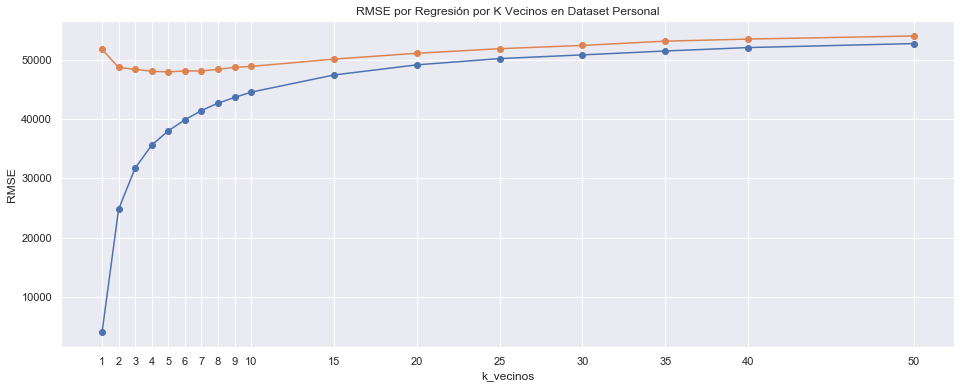

In [175]:
fig = plt.figure(figsize=(16,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.title("RMSE por Regresión por K Vecinos en Dataset Personal")
plt.xticks(k_vecinos)
plt.xlabel("k_vecinos")
plt.ylabel("RMSE")

In [176]:
print(f"El valor del n_neighbors seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor de la tabla train que minimiza el error en test es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo para test es",lista_rmse_test[lista_rmse_test.index(min(lista_rmse_test))])

knn_opt = KNeighborsRegressor(n_neighbors= lista_rmse_test.index(min(lista_rmse_test))+1)
knn_opt.fit(X2_train, y2_train)

El valor del n_neighbors seleccionado es 5
El valor de la tabla train que minimiza el error en test es 37992.987006051946
El valor mínimo para test es 47917.60872530231


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [177]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = list(range(1,51))

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad deseada
    tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X2_train,y2_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y2_train_pred = tree.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y2_test_pred = tree.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

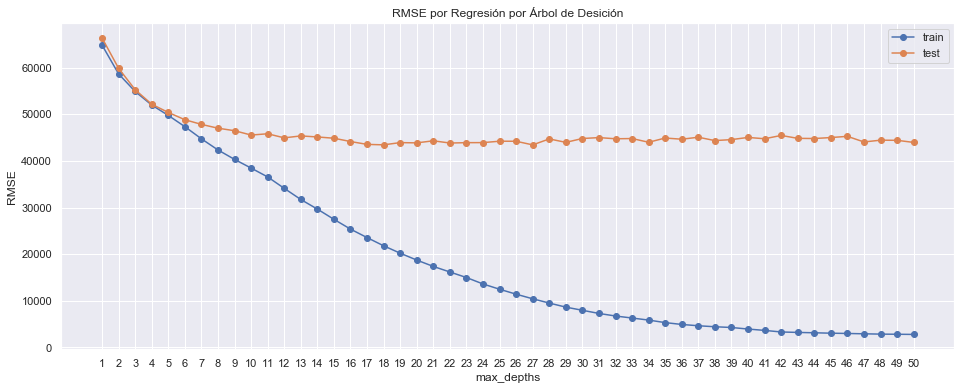

In [178]:
fig = plt.figure(figsize=(16,6))
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.title("RMSE por Regresión por Árbol de Desición")
plt.xticks(max_depths)
plt.xlabel("max_depths")
plt.ylabel("RMSE")

In [179]:
print(f"El valor del max_depth seleccionado es {lista_rmse_test.index(min(lista_rmse_test))+1}")
print("El valor del RMSE de train es",lista_rmse_train[lista_rmse_test.index(min(lista_rmse_test))])
print("El valor mínimo para test es",min(lista_rmse_test))

tree_opt = DecisionTreeRegressor(max_depth= lista_rmse_test.index(min(lista_rmse_test))+1, random_state=42)
tree_opt.fit(X2_train, y2_train)

El valor del max_depth seleccionado es 27
El valor del RMSE de train es 10447.867421274846
El valor mínimo para test es 43455.80603148966


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=27,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Modelo: Regresión lineal 2
Raíz del error cuadrático medio en Train: 46025.93303707185
Raíz del error cuadrático medio en Test: 45601.81112408201


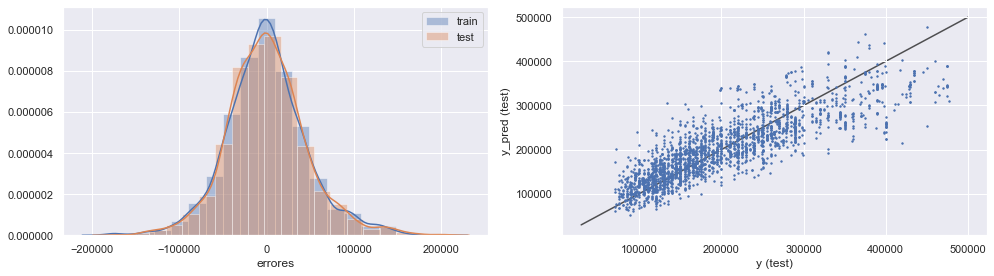

Modelo: Árbol de Decisión 2 Optimizado
Raíz del error cuadrático medio en Train: 10447.867421274846
Raíz del error cuadrático medio en Test: 43455.80603148966


C:\Users\usuario\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


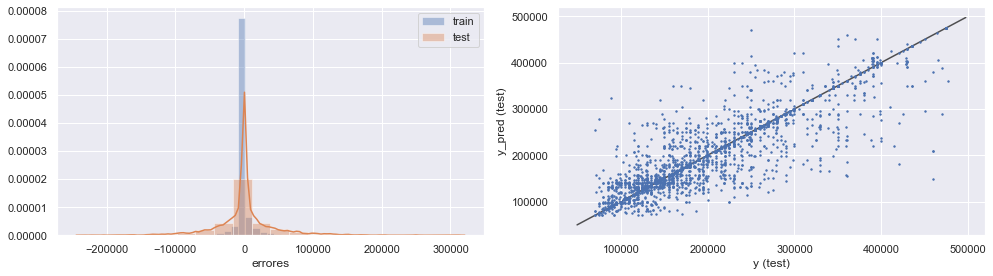

Modelo: Vecinos más cercanos 2 Optimizado
Raíz del error cuadrático medio en Train: 37992.987006051946
Raíz del error cuadrático medio en Test: 47917.60872530231


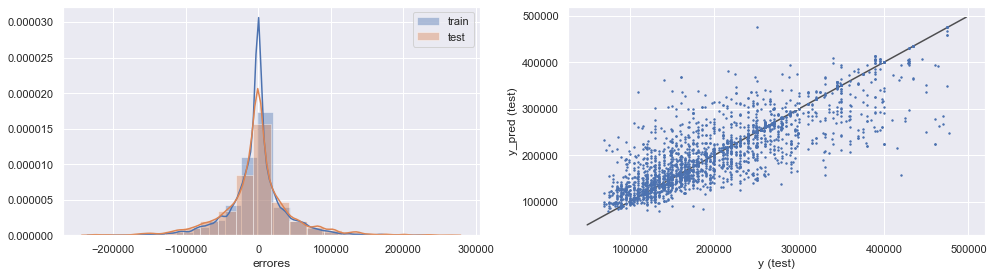

In [180]:
modelos = ['Regresión lineal 2', 'Árbol de Decisión 2 Optimizado', 'Vecinos más cercanos 2 Optimizado']

for i, model in enumerate([linear_model2, tree_opt, knn_opt]):
    y2_train_pred = model.predict(X2_train)
    y2_test_pred = model.predict(X2_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y2_train - y2_train_pred, bins = 20, label = 'train')
    sns.distplot(y2_test - y2_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y2_test,y2_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Resultados para PHs:

El seleccionado es: **Árbol de Decisión 2 Optimizado**

Raíz del error cuadrático medio en Train: 10447.867421274846

Raíz del error cuadrático medio en Test: 43455.80603148966

# Resultado General de los RMSE ponderados:

In [181]:
RMSE_dptos_Train= 9411.239303385582
RMSE_dptos_Test= 37164.81783008725

RMSE_casas_Train= 89473.23395429348
RMSE_casas_Test= 93820.5651665717

RMSE_phs_Train= 10447.867421274846
RMSE_phs_Test= 43455.80603148966

In [182]:
RMSE_ponderado_Train = (RMSE_dptos_Train * 38258 + RMSE_casas_Train * 1051 + RMSE_phs_Train * 5630) / (38258 + 1051 + 5630)

RMSE_ponderado_Test = (RMSE_dptos_Test * 16397 + RMSE_casas_Test * 451 + RMSE_phs_Test * 2414) / (16397 + 451 + 2414)

print(f"RMSE ponderado para train: {RMSE_ponderado_Train}")
print(f"RMSE ponderado para test: {RMSE_ponderado_Test}")

RMSE ponderado para train: 11413.539592262076
RMSE ponderado para test: 39279.76890302568


# RESULTADOS FINALES:

* Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Si bien específicamente la sección de Machine Learning nos solicita predecir el precio de propiedades tipo **Departamento**. Luego, al pedir que filtremos y nos quedemos con los tipos **Departamento**, **Casa** y **PH**, nos genera una controversia que dificulta la precisión del desarrollo.

Se tomó la decisión en primer lugar de cumplir con las demandas al pie de la letra, lo cual nos arrojó al **Árbol de Decisión Optimizado** como el mejor modelo para estimar el precio de las propiedades. 

Sin embargo, al repetir los pasos de estimación, esta vez con los filtros consecuentes con el **análisis de los datos** resaltados en la segunda sección y además, considerando a traves de variables dummies a los barrios y los tipos de las propiedades,  se llega a que el modelo mas preciso es el **Árbol de Decisión Optimizado 2**.

Como tercera alternativa, se estiman **3 modelos diferentes**, *uno para cada tipo de propiedad*. Se armó un promedio ponderado del error observado por el mejor modelo para cada propiedad para establecer un valor comparativo entre los 3 modelos por separado y el **Árbol de Decisión Optimizado 2**. Se llegó a la conclusión de que **esta metodología es superior** dado que el RMSE poderado < RMSE del Árbol de Decisión Optimizado 2.

Retomando el problema de la definición sobre a que tipo de propiedad estimar los precios, si solo considemos a los Departamentos, el modelo individualizado daría un error inferior para un **Árbol de Decisión Optimizado 2**.

Para ir cerrando este proyecto, considero que la falta de información adicional como algunas de las caracteristicas resaltadas en la primera sección dificulta la obtención de un mejor resultado. Si bien se omitieron variables como "Title" o "Description" por no contar con herramientas de análisis de textos, para una versión futura del proyecto se buscará disminuir el error con el uso de estas variables.